In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
 
from sklearn.datasets import load_iris
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
iris = load_iris() 

lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=7)
gnb_clf = GaussianNB()

vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=.2)
vo_clf.fit(X_train,y_train)
pred = vo_clf.predict(X_test)
accuracy_score(y_test, pred)

0.9666666666666667

In [6]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[13,  0,  0],
       [ 0,  6,  1],
       [ 0,  0, 10]], dtype=int64)

In [9]:
!pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 6.5 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import lightgbm

In [11]:
lightgbm.__version__

'3.3.3'

In [2]:
# LightGBM에 파이썬 패키지인 lightgbm 에서 LGBMClassifier import
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [2]:
cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target']=dataset.target

X_features = dataset.data
y_label = dataset.target

In [64]:
# 전체 데이터 중 80을 학습용으로 20을 데이터 용으로 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=11)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90은 학습, 10은 검증용으로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=11)

In [65]:
# 학습

# 앞서 XGBoost와 동일하게 n_estimators는 400
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)

# Liglightgbm도 XBoost와 동일하게 조기 중단(early_stopping_rounds) 수행 가능
evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric="logloss", eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	training's binary_logloss: 0.625698	valid_1's binary_logloss: 0.624016
[2]	training's binary_logloss: 0.589817	valid_1's binary_logloss: 0.590639
[3]	training's binary_logloss: 0.557458	valid_1's binary_logloss: 0.560341
[4]	training's binary_logloss: 0.527206	valid_1's binary_logloss: 0.534153
[5]	training's binary_logloss: 0.500231	valid_1's binary_logloss: 0.512084
[6]	training's binary_logloss: 0.475636	valid_1's binary_logloss: 0.489018
[7]	training's binary_logloss: 0.452189	valid_1's binary_logloss: 0.468234
[8]	training's binary_logloss: 0.430819	valid_1's binary_logloss: 0.447592
[9]	training's binary_logloss: 0.411462	valid_1's binary_logloss: 0.430191
[10]	training's binary_logloss: 0.39312	valid_1's binary_logloss: 0.412366
[11]	training's binary_logloss: 0.375588	valid_1's binary_logloss: 0.396077
[12]	training's binary_logloss: 0.359471	valid_1's binary_logloss: 0.382347
[13]	training's binary_logloss: 0.343921	valid_1's binary_logloss: 0.366848
[14]	training's binary

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [18]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test, pred = None, pred_proba = None) :
    confusion = confusion_matrix(y_test, pred)    #  오차행렬
    accuracy = accuracy_score(y_test, pred)       # 정확도
    precision = precision_score(y_test, pred)     # 정밀도
    recall = recall_score(y_test, pred)           # 재현율
    
    f1 = f1_score(y_test, pred)      # F1 스코어
    
    # ROC-AUC
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    
    print()
    # ROC-AUC 추가
    print(f'정확도:{accuracy:.4f}, 정밀도:{precision:.4f}, 재현율:{recall:.4f}, f1_score:{f1:.4f}, AUC:{roc_auc:.4f}')

In [66]:
# 예측
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

# 평가
get_clf_eval(y_test, preds, pred_proba)

오차행렬
[[36  2]
 [ 0 76]]

정확도:0.9825, 정밀도:0.9744, 재현율:1.0000, f1_score:0.9870, AUC:1.0000


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

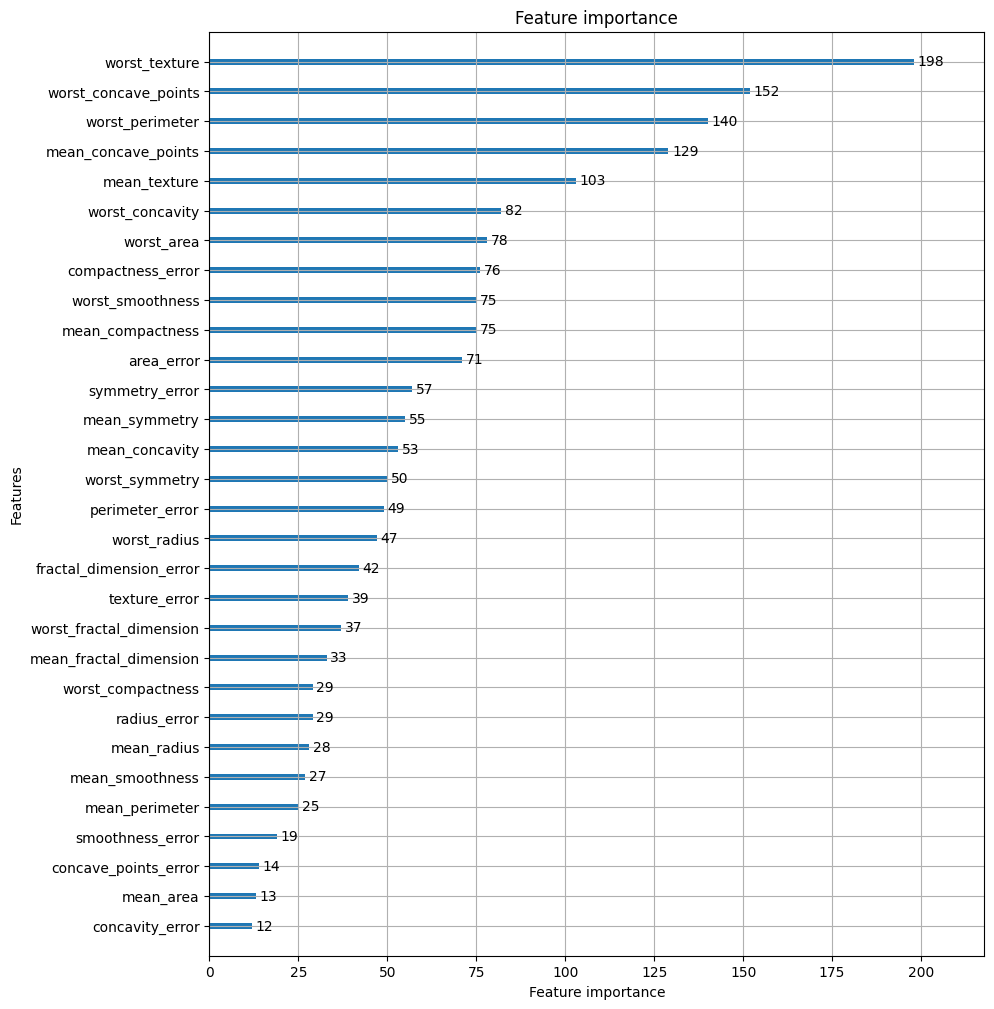

In [31]:
# plot_imporance()를 이용하여 feature중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

# HyperOpt 사용해보기
베이지안 최적화를 머신러닝 모델의 하이퍼 파라미터 튜닝에 적용할 수 있게 제공되는 패키지.
`pip install`을 통해 설치할 수 있으며 `HyperOpt`의 주요 로직은 아래와 같다.
첫번째는 입력변수명과 입력값의 공간설정
둘째는 목적함수의 설정
마지막으로 목적함수의 반환최솟값을 가지는 최적 입력값 유추

입력 변수명과 입력값 검색 공간은 딕셔너리 형태로 설정한다. key값으로 입력 변수명, value값으로 해당 입력 견수의 검색공간이 주어짐

In [ ]:
!pip install hyperopt

In [3]:
from hyperopt import hp

# 2개의 입력변수 x,y에 대해서 입력값 검색 공간을 지정한다.+

# -10 ~ 10까지의 1 간격 설정
# 입력변수 x와 -15 ~ 15까지 1 간격으로 입력 변수 y 설정
search_space = {'x' : hp.quniform('x', -10, 10, 1), 'y' : hp.quniform('y', -15, 15, 1)}

입력값의 검색 공간을 제공하는 대표적 함수들(인자로 들어가는 label은 입력 변수명을 다시 적어준다.
(low : 최소값 / high : 최댓값 / q : 간격

hp.quniform(label, low, hight, q) : label로 지정된 입력값 변수 검색 공간을 최솟값 low에서 최대값 high까지의 q 간격을 가지고 설정

In [59]:
from hyperopt import STATUS_OK

# 목적 함수를 생성, 변수값과 변수 검색 공간을 가지는 딕셔너리를 인자로 받고, 특정 값을 반환
def objective_func(search_space) :
    x = search_space['x']
    y = search_space['y']
    retval = x**2 - 20*y
    
    return retval

In [60]:
from hyperopt import fmin, tpe, Trials

# 입력 결과값을 저장한 Trials 객체값 생성
trial_val = Trials()

# 목적 함수의 최소값을 반환하는 최적 입력 변수값을 5번 입력값 시도(max_evals = 5)로 찾아내보자
best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=5, trials=trial_val
               # rstate는 결과값이 책과 동일하게 만들기 위해 적용한것으로 일반적으로는 잘 이용안함
               , rstate=np.random.default_rng(seed=0))

print('best : ', best_01)

100%|█████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 835.55trial/s, best loss: -224.0]
best :  {'x': -4.0, 'y': 12.0}


In [44]:
# max_evals값을 20으로 수행하도록 하면 어떤 최적값을 반환하는지 살펴보기
best_02 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=20, trials=trial_val
               # rstate는 결과값이 책과 동일하게 만들기 위해 적용한것으로 일반적으로는 잘 이용안함
               , rstate=np.random.default_rng(seed=0))

print('best : ', best_02)

100%|███████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 578.48trial/s, best loss: -296.0]
best :  {'x': 2.0, 'y': 15.0}


In [45]:
X_featuresfrom hyperopt import fmin, tpe, Trials

# 입력 결과값을 저장한 Trials 객체값 생성
trial_val = Trials()

# 목적 함수의 최소값을 반환하는 최적 입력 변수값을 5번 입력값 시도(max_evals = 5)로 찾아내보자
best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=5, trials=trial_val
               # rstate는 결과값이 책과 동일하게 만들기 위해 적용한것으로 일반적으로는 잘 이용안함
               , rstate=np.random.default_rng(seed=0))

print('best : ', best_01)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
# 아까 불러와줬던 위스콘신 유방암 데이터 셋 사용
dataset
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=150)
# 위에서 만든 X_train, y_train을 다시 쪼개서 90은 학습, 10은 검증용으로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=11)

In [4]:
from hyperopt import hp

# max_dept는 5에서 20까지 1 간격으로, min_child_weight는 1에서 2까지 1간격으로
# colsample_bytree는 0.5에서 1사이, learning_rate는 0.01에서 0.2 사이 정규 분포된 값으로 검색.
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 20, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 2, 1),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
                   } 

In [5]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

# fmin()에서 입력된 search_space 값으로 입력된 모든 값은 실수형임.
# XGBClassifier의 정수형 하이퍼 파라미터는 정수형 변환을 해줘야 함.
# 정확도는 높을수록 더 좋은 수치임. -1 * 정확도를 곱해서 큰 정확도 값일수록 최소가 되도록 변환
def objective_func(search_space):
    # 수행 시간 절약을 위해 n_estimators 100으로 축소
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            learning_rate=search_space['learning_rate'],
                            colsample_bytree=search_space['colsample_bytree'],
                            eval_metric='logloss')
    accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)
    
    # accuracy는 cv=3 개수만큼 roc-auc 결과를 리스트로 가짐. 이를 평균해서 반환하되 -1을 곱함.
    return {'loss':-1 * np.mean(accuracy), 'status': STATUS_OK} 

In [6]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50,     # 최대 반복 횟수 지정
            trials=trial_val, rstate=np.random.default_rng(seed=9))

print('best : ', best)

100%|███████████████████████████████████████████████| 50/50 [00:11<00:00,  4.36trial/s, best loss: -0.9517398629022887]
best :  {'colsample_bytree': 0.5036717216371022, 'learning_rate': 0.19808959234346474, 'max_depth': 12.0, 'min_child_weight': 1.0}


In [13]:
xgb_wrapper = XGBClassifier(n_estimators=400,
                            learning_rate=round(best['learning_rate'], 5),
                            max_depth=int(best['max_depth']),
                            min_child_weight=int(best['min_child_weight']),
                            colsample_bytree=round(best['colsample_bytree'], 5)
                           )

evals = [(X_tr, y_tr), (X_val, y_val)]
# 재학습
# verbose=False = 진행되는거 안봐도 괜찮다
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss', eval_set=evals, verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.50367,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.19809, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [15]:
# 예측
preds = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(y_test, preds, pred_proba)

오차행렬
[[40  2]
 [ 0 72]]

정확도:0.9825, 정밀도:0.9730, 재현율:1.0000, f1_score:0.9863, AUC:0.9937


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("./santander_customer/train.csv")
print('dataset shape : ', cust_df.shape)
cust_df[:3]

dataset shape :  (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [5]:
cust_df.TARGET.value_counts()/len(cust_df)

0    0.960431
1    0.039569
Name: TARGET, dtype: float64

In [6]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [7]:
cust_df.var3.min()

-999999

레이블인 TARGET 속성의 값 분포를 알아보니 불만족인 고객이 4%대로 매우 불균형한 자료임을 확인할 수 있다. 또한 min()값을 측정하였을 때 -999999인 값이 있는데, 이는 NaN이나 특정 예외 값을 이와 같이 변환했다고 생각해 볼 수 있으나, 다른 값에 비해 너무 편차가 크므로 해당 수를 값이 가장 많은 2로 변환하자.

In [8]:
cust_df['var3'] = cust_df['var3'].replace(-999999, 2)
cust_df['var3'].value_counts()
# 2      74281
# 8        138
# 9        110
# 3        108
# 1        105
#        ...  
# 231        1
# 188        1
# 168        1
# 135        1
# 87         1
# Name: var3, Length: 207, dtype: int64


cust_df['var3'].min()
# 0

0

ID는 지우고, Target은 label로 분리

In [9]:
cust_df.drop(['ID'], axis=1, inplace = True)

In [10]:
X_features = cust_df.iloc[:,:-1]
y_label = cust_df.iloc[:, -1]

In [11]:
X_features.shape

(76020, 369)

In [12]:
pd.DataFrame(X_features)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000
76016,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000
76017,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000
76018,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000


In [13]:
# train과 test 셋 나눠주기
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=11)

# 나눠준 train 데이터를 다시 학습과 검증 데이터로 분리
# 조기중단(early stopping)을 위하여
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=11)

XGB 모델 학습과 하이퍼 파라미터 튜닝
학습 모델을 생성하고 예측 결과를 TOC AUC로 평가해보기로 한다... 앞에서 분리한 학습과 검증 데이터 셋을 이용하여 조기 중단은 100회로 설정

In [14]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=156)

In [15]:
# 성능 평가 지표를 aux로, 조기 중단 파라미터는 100으로 설정하고 학습 수행
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_tr, y_tr), (X_val, y_val)])

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.82085	validation_1-auc:0.79314
[1]	validation_0-auc:0.82587	validation_1-auc:0.79861
[2]	validation_0-auc:0.82692	validation_1-auc:0.79956
[3]	validation_0-auc:0.82928	validation_1-auc:0.80122
[4]	validation_0-auc:0.83038	validation_1-auc:0.80243
[5]	validation_0-auc:0.83314	validation_1-auc:0.80555
[6]	validation_0-auc:0.83541	validation_1-auc:0.80581
[7]	validation_0-auc:0.83546	validation_1-auc:0.80565
[8]	validation_0-auc:0.83692	validation_1-auc:0.80710
[9]	validation_0-auc:0.83744	validation_1-auc:0.80835
[10]	validation_0-auc:0.83867	validation_1-auc:0.80952
[11]	validation_0-auc:0.84010	validation_1-auc:0.81187
[12]	validation_0-auc:0.84067	validation_1-auc:0.81194
[13]	validation_0-auc:0.84183	validation_1-auc:0.81210
[14]	validation_0-auc:0.84196	validation_1-auc:0.81229
[15]	validation_0-auc:0.84231	validation_1-auc:0.81211
[16]	validation_0-auc:0.84298	validation_1-auc:0.81277
[17]	validation_0-auc:0.84364	validation_1-auc:0.81337
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=156,
              reg_alpha=0, reg_lambda=1, ...)

In [16]:
# 500번 학습을 설정하였으나 조기 중단으로 269까지만 학습함

# 테스트 데이터 셋으로 ROC-AUC 값 확인하기
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print(f'ROC AUC : {xgb_roc_score}')

ROC AUC : 0.8326294708915177


In [19]:
preds = xgb_clf.predict(X_test)
accuracy_score(y_test, preds)

0.9606682451986319

HyperOpt를 이용하여 베이지안 최적화 기반으로 XGB의 하이퍼 파라미터 튜닝을 수행해보자.

In [20]:
from hyperopt import hp

# 하이퍼 파라미터 검색 공간 설정
                    # max_depth는 5에서 15까지 간격 1로
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1), 
                    # min_child_weight는 1에서 6까지 간격 1로
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
                    # colsample_bytree는 0.5에서 0.95사이
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
                    # learning_rate는 0.01에서 0.2사이 정규 분포된 값
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
                   }

목적함수. 3 Fold 교차검능을 이용해 평균 ROC-AUC값을 반환하되 -1을 곱해줘 최대 ROC-AUC값이 최소 반환값이 되도록 한다.

In [21]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# 목적 함수 설정. 
# 추후 fmin()에서 입력된 search_space값으로 XGBClassifier 교차 검증 학습 후 -1* roc_auc 평균 값을 반환.  
def objective_func(search_space):
    # 하이퍼 파라미터 검색 공간
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth'])
                           , min_child_weight=int(search_space['min_child_weight'])
                            , colsample_bytree=search_space['colsample_bytree']
                            , learning_rate=search_space['learning_rate']
                           )
    
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list= []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행.
        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc'
                   , eval_set=[(X_tr, y_tr), (X_val, y_val)])
    
        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음. 
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
    
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환. 
    return -1 * np.mean(roc_auc_list) 

`fmin()` 함수를 호출해 max_eval=50회 반복하며 최적의 하이퍼 파라미터를 도출하자.

In [22]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출, 목적함수의 최소값을 가지는 최적 입력값을 추출하자
best = fmin(fn=objective_func,
           space=xgb_search_space,
           algo=tpe.suggest,
           # 지정된 횟수만큼 반복
           max_evals=50,
           trials=trials, rstate=np.random.default_rng(seed=30)
           )

  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81765	validation_1-auc:0.79057                                                                  
[1]	validation_0-auc:0.83223	validation_1-auc:0.80412                                                                  
[2]	validation_0-auc:0.83711	validation_1-auc:0.80809                                                                  
[3]	validation_0-auc:0.83997	validation_1-auc:0.80896                                                                  
[4]	validation_0-auc:0.84064	validation_1-auc:0.80974                                                                  
[5]	validation_0-auc:0.84472	validation_1-auc:0.81253                                                                  
[6]	validation_0-auc:0.85057	validation_1-auc:0.81697                                                                  
[7]	validation_0-auc:0.85142	validation_1-auc:0.81814                                                                  
[8]	validation_0-auc:0.85199	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82069	validation_1-auc:0.80562                                                                  
[1]	validation_0-auc:0.82807	validation_1-auc:0.81240                                                                  
[2]	validation_0-auc:0.83383	validation_1-auc:0.81591                                                                  
[3]	validation_0-auc:0.83648	validation_1-auc:0.81839                                                                  
[4]	validation_0-auc:0.84047	validation_1-auc:0.82119                                                                  
[5]	validation_0-auc:0.84118	validation_1-auc:0.82127                                                                  
[6]	validation_0-auc:0.84185	validation_1-auc:0.82138                                                                  
[7]	validation_0-auc:0.84339	validation_1-auc:0.82203                                                                  
[8]	validation_0-auc:0.84426	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81735	validation_1-auc:0.81336                                                                  
[1]	validation_0-auc:0.82798	validation_1-auc:0.82147                                                                  
[2]	validation_0-auc:0.83481	validation_1-auc:0.82659                                                                  
[3]	validation_0-auc:0.83700	validation_1-auc:0.82645                                                                  
[4]	validation_0-auc:0.83809	validation_1-auc:0.82649                                                                  
[5]	validation_0-auc:0.83785	validation_1-auc:0.82631                                                                  
[6]	validation_0-auc:0.84032	validation_1-auc:0.82851                                                                  
[7]	validation_0-auc:0.84101	validation_1-auc:0.82810                                                                  
[8]	validation_0-auc:0.84192	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83296	validation_1-auc:0.79827                                                                  
[1]	validation_0-auc:0.84028	validation_1-auc:0.80508                                                                  
[2]	validation_0-auc:0.84483	validation_1-auc:0.80744                                                                  
[3]	validation_0-auc:0.84678	validation_1-auc:0.80736                                                                  
[4]	validation_0-auc:0.85297	validation_1-auc:0.80990                                                                  
[5]	validation_0-auc:0.85973	validation_1-auc:0.81268                                                                  
[6]	validation_0-auc:0.86107	validation_1-auc:0.81223                                                                  
[7]	validation_0-auc:0.86332	validation_1-auc:0.81459                                                                  
[8]	validation_0-auc:0.86611	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82755	validation_1-auc:0.80774                                                                  
[1]	validation_0-auc:0.83370	validation_1-auc:0.81070                                                                  
[2]	validation_0-auc:0.84133	validation_1-auc:0.81781                                                                  
[3]	validation_0-auc:0.84326	validation_1-auc:0.81870                                                                  
[4]	validation_0-auc:0.85182	validation_1-auc:0.82255                                                                  
[5]	validation_0-auc:0.85305	validation_1-auc:0.82661                                                                  
[6]	validation_0-auc:0.85633	validation_1-auc:0.82842                                                                  
[7]	validation_0-auc:0.85837	validation_1-auc:0.82784                                                                  
[8]	validation_0-auc:0.85961	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82292	validation_1-auc:0.81160                                                                  
[1]	validation_0-auc:0.82796	validation_1-auc:0.81408                                                                  
[2]	validation_0-auc:0.83706	validation_1-auc:0.81727                                                                  
[3]	validation_0-auc:0.83885	validation_1-auc:0.81972                                                                  
[4]	validation_0-auc:0.84714	validation_1-auc:0.82301                                                                  
[5]	validation_0-auc:0.85254	validation_1-auc:0.82364                                                                  
[6]	validation_0-auc:0.85590	validation_1-auc:0.82806                                                                  
[7]	validation_0-auc:0.85913	validation_1-auc:0.83224                                                                  
[8]	validation_0-auc:0.86028	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83740	validation_1-auc:0.80009                                                                  
[1]	validation_0-auc:0.84585	validation_1-auc:0.80691                                                                  
[2]	validation_0-auc:0.85171	validation_1-auc:0.80879                                                                  
[3]	validation_0-auc:0.86156	validation_1-auc:0.81075                                                                  
[4]	validation_0-auc:0.86561	validation_1-auc:0.81198                                                                  
[5]	validation_0-auc:0.87292	validation_1-auc:0.81502                                                                  
[6]	validation_0-auc:0.87517	validation_1-auc:0.81865                                                                  
[7]	validation_0-auc:0.87821	validation_1-auc:0.81813                                                                  
[8]	validation_0-auc:0.88159	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82713	validation_1-auc:0.80720                                                                  
[1]	validation_0-auc:0.84040	validation_1-auc:0.81701                                                                  
[2]	validation_0-auc:0.84827	validation_1-auc:0.81827                                                                  
[3]	validation_0-auc:0.85184	validation_1-auc:0.81989                                                                  
[4]	validation_0-auc:0.85744	validation_1-auc:0.82155                                                                  
[5]	validation_0-auc:0.86104	validation_1-auc:0.82332                                                                  
[6]	validation_0-auc:0.86717	validation_1-auc:0.82470                                                                  
[7]	validation_0-auc:0.86944	validation_1-auc:0.82665                                                                  
[8]	validation_0-auc:0.87266	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82456	validation_1-auc:0.81063                                                                  
[1]	validation_0-auc:0.83161	validation_1-auc:0.81581                                                                  
[2]	validation_0-auc:0.84368	validation_1-auc:0.82390                                                                  
[3]	validation_0-auc:0.84999	validation_1-auc:0.82439                                                                  
[4]	validation_0-auc:0.85662	validation_1-auc:0.82673                                                                  
[5]	validation_0-auc:0.86012	validation_1-auc:0.82957                                                                  
[6]	validation_0-auc:0.86316	validation_1-auc:0.83088                                                                  
[7]	validation_0-auc:0.86858	validation_1-auc:0.83311                                                                  
[8]	validation_0-auc:0.87118	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83462	validation_1-auc:0.79846                                                                  
[1]	validation_0-auc:0.84178	validation_1-auc:0.80547                                                                  
[2]	validation_0-auc:0.84513	validation_1-auc:0.80732                                                                  
[3]	validation_0-auc:0.84786	validation_1-auc:0.80739                                                                  
[4]	validation_0-auc:0.85230	validation_1-auc:0.80783                                                                  
[5]	validation_0-auc:0.85648	validation_1-auc:0.81291                                                                  
[6]	validation_0-auc:0.85956	validation_1-auc:0.81237                                                                  
[7]	validation_0-auc:0.85999	validation_1-auc:0.81232                                                                  
[8]	validation_0-auc:0.86237	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82863	validation_1-auc:0.80706                                                                  
[1]	validation_0-auc:0.83312	validation_1-auc:0.80945                                                                  
[2]	validation_0-auc:0.83915	validation_1-auc:0.81296                                                                  
[3]	validation_0-auc:0.84264	validation_1-auc:0.81506                                                                  
[4]	validation_0-auc:0.85008	validation_1-auc:0.81995                                                                  
[5]	validation_0-auc:0.85254	validation_1-auc:0.82505                                                                  
[6]	validation_0-auc:0.85373	validation_1-auc:0.82563                                                                  
[7]	validation_0-auc:0.85741	validation_1-auc:0.82547                                                                  
[8]	validation_0-auc:0.85922	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82368	validation_1-auc:0.81115                                                                  
[1]	validation_0-auc:0.82858	validation_1-auc:0.81242                                                                  
[2]	validation_0-auc:0.83654	validation_1-auc:0.81603                                                                  
[3]	validation_0-auc:0.84024	validation_1-auc:0.81914                                                                  
[4]	validation_0-auc:0.84639	validation_1-auc:0.82179                                                                  
[5]	validation_0-auc:0.85368	validation_1-auc:0.82447                                                                  
[6]	validation_0-auc:0.85621	validation_1-auc:0.83067                                                                  
[7]	validation_0-auc:0.85669	validation_1-auc:0.83058                                                                  
[8]	validation_0-auc:0.85758	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83849	validation_1-auc:0.80037                                                                  
[1]	validation_0-auc:0.84672	validation_1-auc:0.80520                                                                  
[2]	validation_0-auc:0.86035	validation_1-auc:0.81211                                                                  
[3]	validation_0-auc:0.86975	validation_1-auc:0.81651                                                                  
[4]	validation_0-auc:0.87486	validation_1-auc:0.81762                                                                  
[5]	validation_0-auc:0.88031	validation_1-auc:0.81832                                                                  
[6]	validation_0-auc:0.88521	validation_1-auc:0.81881                                                                  
[7]	validation_0-auc:0.88730	validation_1-auc:0.81794                                                                  
[8]	validation_0-auc:0.89184	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82885	validation_1-auc:0.80685                                                                  
[1]	validation_0-auc:0.84333	validation_1-auc:0.81110                                                                  
[2]	validation_0-auc:0.85041	validation_1-auc:0.81734                                                                  
[3]	validation_0-auc:0.85485	validation_1-auc:0.81640                                                                  
[4]	validation_0-auc:0.86681	validation_1-auc:0.82007                                                                  
[5]	validation_0-auc:0.87117	validation_1-auc:0.82286                                                                  
[6]	validation_0-auc:0.87574	validation_1-auc:0.82403                                                                  
[7]	validation_0-auc:0.87985	validation_1-auc:0.82591                                                                  
[8]	validation_0-auc:0.88327	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82634	validation_1-auc:0.81155                                                                  
[1]	validation_0-auc:0.83777	validation_1-auc:0.81850                                                                  
[2]	validation_0-auc:0.84755	validation_1-auc:0.82520                                                                  
[3]	validation_0-auc:0.85708	validation_1-auc:0.82853                                                                  
[4]	validation_0-auc:0.86354	validation_1-auc:0.83071                                                                  
[5]	validation_0-auc:0.86930	validation_1-auc:0.83302                                                                  
[6]	validation_0-auc:0.87372	validation_1-auc:0.83450                                                                  
[7]	validation_0-auc:0.87821	validation_1-auc:0.83513                                                                  
[8]	validation_0-auc:0.88139	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83014	validation_1-auc:0.79859                                                                  
[1]	validation_0-auc:0.83627	validation_1-auc:0.80493                                                                  
[2]	validation_0-auc:0.84102	validation_1-auc:0.80752                                                                  
[3]	validation_0-auc:0.84288	validation_1-auc:0.80845                                                                  
[4]	validation_0-auc:0.84707	validation_1-auc:0.80970                                                                  
[5]	validation_0-auc:0.84943	validation_1-auc:0.81108                                                                  
[6]	validation_0-auc:0.85351	validation_1-auc:0.81381                                                                  
[7]	validation_0-auc:0.85742	validation_1-auc:0.81723                                                                  
[8]	validation_0-auc:0.85976	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82361	validation_1-auc:0.80615                                                                  
[1]	validation_0-auc:0.82948	validation_1-auc:0.81076                                                                  
[2]	validation_0-auc:0.83767	validation_1-auc:0.81570                                                                  
[3]	validation_0-auc:0.83931	validation_1-auc:0.81933                                                                  
[4]	validation_0-auc:0.84561	validation_1-auc:0.82469                                                                  
[5]	validation_0-auc:0.84927	validation_1-auc:0.82594                                                                  
[6]	validation_0-auc:0.85111	validation_1-auc:0.82676                                                                  
[7]	validation_0-auc:0.85238	validation_1-auc:0.82700                                                                  
[8]	validation_0-auc:0.85201	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81875	validation_1-auc:0.81424                                                                  
[1]	validation_0-auc:0.82345	validation_1-auc:0.81559                                                                  
[2]	validation_0-auc:0.83433	validation_1-auc:0.82575                                                                  
[3]	validation_0-auc:0.83767	validation_1-auc:0.82661                                                                  
[4]	validation_0-auc:0.84262	validation_1-auc:0.82789                                                                  
[5]	validation_0-auc:0.84446	validation_1-auc:0.83036                                                                  
[6]	validation_0-auc:0.84688	validation_1-auc:0.83092                                                                  
[7]	validation_0-auc:0.84748	validation_1-auc:0.83113                                                                  
[8]	validation_0-auc:0.84876	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83022	validation_1-auc:0.79911                                                                  
[1]	validation_0-auc:0.83831	validation_1-auc:0.80544                                                                  
[2]	validation_0-auc:0.84394	validation_1-auc:0.80759                                                                  
[3]	validation_0-auc:0.84595	validation_1-auc:0.80814                                                                  
[4]	validation_0-auc:0.84865	validation_1-auc:0.80975                                                                  
[5]	validation_0-auc:0.85388	validation_1-auc:0.81300                                                                  
[6]	validation_0-auc:0.85790	validation_1-auc:0.81559                                                                  
[7]	validation_0-auc:0.86135	validation_1-auc:0.81821                                                                  
[8]	validation_0-auc:0.86196	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82306	validation_1-auc:0.80687                                                                  
[1]	validation_0-auc:0.83515	validation_1-auc:0.81827                                                                  
[2]	validation_0-auc:0.84012	validation_1-auc:0.81822                                                                  
[3]	validation_0-auc:0.84183	validation_1-auc:0.82152                                                                  
[4]	validation_0-auc:0.84727	validation_1-auc:0.82535                                                                  
[5]	validation_0-auc:0.84963	validation_1-auc:0.82690                                                                  
[6]	validation_0-auc:0.85355	validation_1-auc:0.83128                                                                  
[7]	validation_0-auc:0.85552	validation_1-auc:0.83060                                                                  
[8]	validation_0-auc:0.85651	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81848	validation_1-auc:0.81342                                                                  
[1]	validation_0-auc:0.82683	validation_1-auc:0.81711                                                                  
[2]	validation_0-auc:0.83753	validation_1-auc:0.82490                                                                  
[3]	validation_0-auc:0.84024	validation_1-auc:0.82751                                                                  
[4]	validation_0-auc:0.84403	validation_1-auc:0.82823                                                                  
[5]	validation_0-auc:0.84725	validation_1-auc:0.82940                                                                  
[6]	validation_0-auc:0.85103	validation_1-auc:0.83366                                                                  
[7]	validation_0-auc:0.85245	validation_1-auc:0.83342                                                                  
[8]	validation_0-auc:0.85389	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83084	validation_1-auc:0.79379                                                                  
[1]	validation_0-auc:0.84661	validation_1-auc:0.80733                                                                  
[2]	validation_0-auc:0.84887	validation_1-auc:0.80896                                                                  
[3]	validation_0-auc:0.85166	validation_1-auc:0.80878                                                                  
[4]	validation_0-auc:0.85581	validation_1-auc:0.80798                                                                  
[5]	validation_0-auc:0.86079	validation_1-auc:0.80982                                                                  
[6]	validation_0-auc:0.86485	validation_1-auc:0.81183                                                                  
[7]	validation_0-auc:0.86891	validation_1-auc:0.81386                                                                  
[8]	validation_0-auc:0.87059	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82982	validation_1-auc:0.80585                                                                  
[1]	validation_0-auc:0.83890	validation_1-auc:0.80813                                                                  
[2]	validation_0-auc:0.84436	validation_1-auc:0.81339                                                                  
[3]	validation_0-auc:0.84711	validation_1-auc:0.81635                                                                  
[4]	validation_0-auc:0.85129	validation_1-auc:0.81878                                                                  
[5]	validation_0-auc:0.85333	validation_1-auc:0.82021                                                                  
[6]	validation_0-auc:0.85442	validation_1-auc:0.81965                                                                  
[7]	validation_0-auc:0.85908	validation_1-auc:0.82160                                                                  
[8]	validation_0-auc:0.86026	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82445	validation_1-auc:0.81081                                                                  
[1]	validation_0-auc:0.83006	validation_1-auc:0.81323                                                                  
[2]	validation_0-auc:0.83780	validation_1-auc:0.81968                                                                  
[3]	validation_0-auc:0.84253	validation_1-auc:0.82140                                                                  
[4]	validation_0-auc:0.85140	validation_1-auc:0.82670                                                                  
[5]	validation_0-auc:0.85331	validation_1-auc:0.82769                                                                  
[6]	validation_0-auc:0.85500	validation_1-auc:0.82866                                                                  
[7]	validation_0-auc:0.85697	validation_1-auc:0.82973                                                                  
[8]	validation_0-auc:0.86086	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82626	validation_1-auc:0.80002                                                                  
[1]	validation_0-auc:0.83406	validation_1-auc:0.80471                                                                  
[2]	validation_0-auc:0.83964	validation_1-auc:0.81040                                                                  
[3]	validation_0-auc:0.84486	validation_1-auc:0.81459                                                                  
[4]	validation_0-auc:0.84618	validation_1-auc:0.81415                                                                  
[5]	validation_0-auc:0.84891	validation_1-auc:0.81584                                                                  
[6]	validation_0-auc:0.85074	validation_1-auc:0.81695                                                                  
[7]	validation_0-auc:0.85386	validation_1-auc:0.81898                                                                  
[8]	validation_0-auc:0.85520	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82140	validation_1-auc:0.80667                                                                  
[1]	validation_0-auc:0.83042	validation_1-auc:0.81446                                                                  
[2]	validation_0-auc:0.83568	validation_1-auc:0.81811                                                                  
[3]	validation_0-auc:0.83674	validation_1-auc:0.81915                                                                  
[4]	validation_0-auc:0.84126	validation_1-auc:0.82233                                                                  
[5]	validation_0-auc:0.84530	validation_1-auc:0.82460                                                                  
[6]	validation_0-auc:0.84655	validation_1-auc:0.82439                                                                  
[7]	validation_0-auc:0.84848	validation_1-auc:0.82426                                                                  
[8]	validation_0-auc:0.85060	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81726	validation_1-auc:0.81332                                                                  
[1]	validation_0-auc:0.83161	validation_1-auc:0.82220                                                                  
[2]	validation_0-auc:0.83742	validation_1-auc:0.82809                                                                  
[3]	validation_0-auc:0.83883	validation_1-auc:0.82812                                                                  
[4]	validation_0-auc:0.84115	validation_1-auc:0.82889                                                                  
[5]	validation_0-auc:0.84418	validation_1-auc:0.83090                                                                  
[6]	validation_0-auc:0.84467	validation_1-auc:0.83137                                                                  
[7]	validation_0-auc:0.84591	validation_1-auc:0.83273                                                                  
[8]	validation_0-auc:0.84760	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83979	validation_1-auc:0.80132                                                                  
[1]	validation_0-auc:0.84625	validation_1-auc:0.80642                                                                  
[2]	validation_0-auc:0.85301	validation_1-auc:0.80929                                                                  
[3]	validation_0-auc:0.86388	validation_1-auc:0.81356                                                                  
[4]	validation_0-auc:0.87049	validation_1-auc:0.81638                                                                  
[5]	validation_0-auc:0.87556	validation_1-auc:0.81685                                                                  
[6]	validation_0-auc:0.88038	validation_1-auc:0.81726                                                                  
[7]	validation_0-auc:0.88366	validation_1-auc:0.81691                                                                  
[8]	validation_0-auc:0.88663	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82833	validation_1-auc:0.80622                                                                  
[1]	validation_0-auc:0.84479	validation_1-auc:0.81183                                                                  
[2]	validation_0-auc:0.84935	validation_1-auc:0.81615                                                                  
[3]	validation_0-auc:0.85733	validation_1-auc:0.81884                                                                  
[4]	validation_0-auc:0.86227	validation_1-auc:0.81851                                                                  
[5]	validation_0-auc:0.86673	validation_1-auc:0.82069                                                                  
[6]	validation_0-auc:0.87058	validation_1-auc:0.82018                                                                  
[7]	validation_0-auc:0.87367	validation_1-auc:0.82119                                                                  
[8]	validation_0-auc:0.87821	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82626	validation_1-auc:0.81304                                                                  
[1]	validation_0-auc:0.83847	validation_1-auc:0.81962                                                                  
[2]	validation_0-auc:0.84620	validation_1-auc:0.82529                                                                  
[3]	validation_0-auc:0.85306	validation_1-auc:0.82641                                                                  
[4]	validation_0-auc:0.85641	validation_1-auc:0.82844                                                                  
[5]	validation_0-auc:0.86205	validation_1-auc:0.82920                                                                  
[6]	validation_0-auc:0.86774	validation_1-auc:0.83055                                                                  
[7]	validation_0-auc:0.87173	validation_1-auc:0.83330                                                                  
[8]	validation_0-auc:0.87611	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.84113	validation_1-auc:0.80021                                                                  
[1]	validation_0-auc:0.84447	validation_1-auc:0.80072                                                                  
[2]	validation_0-auc:0.84987	validation_1-auc:0.80615                                                                  
[3]	validation_0-auc:0.85232	validation_1-auc:0.80707                                                                  
[4]	validation_0-auc:0.85627	validation_1-auc:0.80766                                                                  
[5]	validation_0-auc:0.85767	validation_1-auc:0.80816                                                                  
[6]	validation_0-auc:0.85901	validation_1-auc:0.80856                                                                  
[7]	validation_0-auc:0.86060	validation_1-auc:0.80880                                                                  
[8]	validation_0-auc:0.86229	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83171	validation_1-auc:0.80650                                                                  
[1]	validation_0-auc:0.83587	validation_1-auc:0.80610                                                                  
[2]	validation_0-auc:0.84384	validation_1-auc:0.80868                                                                  
[3]	validation_0-auc:0.84454	validation_1-auc:0.80874                                                                  
[4]	validation_0-auc:0.84985	validation_1-auc:0.81435                                                                  
[5]	validation_0-auc:0.85060	validation_1-auc:0.81484                                                                  
[6]	validation_0-auc:0.85279	validation_1-auc:0.81703                                                                  
[7]	validation_0-auc:0.85361	validation_1-auc:0.81737                                                                  
[8]	validation_0-auc:0.85710	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82873	validation_1-auc:0.81230                                                                  
[1]	validation_0-auc:0.83222	validation_1-auc:0.81402                                                                  
[2]	validation_0-auc:0.83500	validation_1-auc:0.81619                                                                  
[3]	validation_0-auc:0.83916	validation_1-auc:0.81749                                                                  
[4]	validation_0-auc:0.84427	validation_1-auc:0.81988                                                                  
[5]	validation_0-auc:0.84463	validation_1-auc:0.82059                                                                  
[6]	validation_0-auc:0.84576	validation_1-auc:0.82223                                                                  
[7]	validation_0-auc:0.84823	validation_1-auc:0.82356                                                                  
[8]	validation_0-auc:0.84871	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.84208	validation_1-auc:0.80045                                                                  
[1]	validation_0-auc:0.84908	validation_1-auc:0.80571                                                                  
[2]	validation_0-auc:0.85585	validation_1-auc:0.80808                                                                  
[3]	validation_0-auc:0.86952	validation_1-auc:0.81288                                                                  
[4]	validation_0-auc:0.87689	validation_1-auc:0.81456                                                                  
[5]	validation_0-auc:0.88181	validation_1-auc:0.81505                                                                  
[6]	validation_0-auc:0.88760	validation_1-auc:0.81652                                                                  
[7]	validation_0-auc:0.89153	validation_1-auc:0.81647                                                                  
[8]	validation_0-auc:0.89469	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83021	validation_1-auc:0.80512                                                                  
[1]	validation_0-auc:0.84722	validation_1-auc:0.81026                                                                  
[2]	validation_0-auc:0.85283	validation_1-auc:0.81466                                                                  
[3]	validation_0-auc:0.86083	validation_1-auc:0.81758                                                                  
[4]	validation_0-auc:0.86529	validation_1-auc:0.81860                                                                  
[5]	validation_0-auc:0.87171	validation_1-auc:0.82122                                                                  
[6]	validation_0-auc:0.87569	validation_1-auc:0.82044                                                                  
[7]	validation_0-auc:0.87872	validation_1-auc:0.81965                                                                  
[8]	validation_0-auc:0.88416	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82903	validation_1-auc:0.81402                                                                  
[1]	validation_0-auc:0.84097	validation_1-auc:0.81958                                                                  
[2]	validation_0-auc:0.84939	validation_1-auc:0.82640                                                                  
[3]	validation_0-auc:0.85568	validation_1-auc:0.82702                                                                  
[4]	validation_0-auc:0.86248	validation_1-auc:0.82808                                                                  
[5]	validation_0-auc:0.86940	validation_1-auc:0.82860                                                                  
[6]	validation_0-auc:0.87459	validation_1-auc:0.83017                                                                  
[7]	validation_0-auc:0.88119	validation_1-auc:0.83001                                                                  
[8]	validation_0-auc:0.88485	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83210	validation_1-auc:0.80004                                                                  
[1]	validation_0-auc:0.83723	validation_1-auc:0.80494                                                                  
[2]	validation_0-auc:0.84159	validation_1-auc:0.80759                                                                  
[3]	validation_0-auc:0.84269	validation_1-auc:0.80786                                                                  
[4]	validation_0-auc:0.84518	validation_1-auc:0.80839                                                                  
[5]	validation_0-auc:0.84587	validation_1-auc:0.80857                                                                  
[6]	validation_0-auc:0.84683	validation_1-auc:0.80896                                                                  
[7]	validation_0-auc:0.84767	validation_1-auc:0.80939                                                                  
[8]	validation_0-auc:0.84880	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82531	validation_1-auc:0.80627                                                                  
[1]	validation_0-auc:0.82947	validation_1-auc:0.80815                                                                  
[2]	validation_0-auc:0.83178	validation_1-auc:0.81037                                                                  
[3]	validation_0-auc:0.83452	validation_1-auc:0.81238                                                                  
[4]	validation_0-auc:0.84307	validation_1-auc:0.82154                                                                  
[5]	validation_0-auc:0.84376	validation_1-auc:0.82143                                                                  
[6]	validation_0-auc:0.84420	validation_1-auc:0.82245                                                                  
[7]	validation_0-auc:0.84457	validation_1-auc:0.82168                                                                  
[8]	validation_0-auc:0.84469	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82022	validation_1-auc:0.81211                                                                  
[1]	validation_0-auc:0.82386	validation_1-auc:0.81594                                                                  
[2]	validation_0-auc:0.82723	validation_1-auc:0.81854                                                                  
[3]	validation_0-auc:0.83197	validation_1-auc:0.82041                                                                  
[4]	validation_0-auc:0.83864	validation_1-auc:0.82531                                                                  
[5]	validation_0-auc:0.83998	validation_1-auc:0.82707                                                                  
[6]	validation_0-auc:0.84180	validation_1-auc:0.82978                                                                  
[7]	validation_0-auc:0.84333	validation_1-auc:0.82952                                                                  
[8]	validation_0-auc:0.84355	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83879	validation_1-auc:0.80175                                                                  
[1]	validation_0-auc:0.84399	validation_1-auc:0.80634                                                                  
[2]	validation_0-auc:0.84956	validation_1-auc:0.80699                                                                  
[3]	validation_0-auc:0.85087	validation_1-auc:0.80762                                                                  
[4]	validation_0-auc:0.85321	validation_1-auc:0.81039                                                                  
[5]	validation_0-auc:0.85373	validation_1-auc:0.81081                                                                  
[6]	validation_0-auc:0.85454	validation_1-auc:0.81100                                                                  
[7]	validation_0-auc:0.85712	validation_1-auc:0.81163                                                                  
[8]	validation_0-auc:0.86177	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82687	validation_1-auc:0.80637                                                                  
[1]	validation_0-auc:0.83771	validation_1-auc:0.80792                                                                  
[2]	validation_0-auc:0.84231	validation_1-auc:0.81221                                                                  
[3]	validation_0-auc:0.84560	validation_1-auc:0.81493                                                                  
[4]	validation_0-auc:0.84761	validation_1-auc:0.81688                                                                  
[5]	validation_0-auc:0.84843	validation_1-auc:0.81762                                                                  
[6]	validation_0-auc:0.85286	validation_1-auc:0.82073                                                                  
[7]	validation_0-auc:0.85400	validation_1-auc:0.82081                                                                  
[8]	validation_0-auc:0.85478	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82502	validation_1-auc:0.81490                                                                  
[1]	validation_0-auc:0.82977	validation_1-auc:0.81516                                                                  
[2]	validation_0-auc:0.83478	validation_1-auc:0.81963                                                                  
[3]	validation_0-auc:0.83756	validation_1-auc:0.82112                                                                  
[4]	validation_0-auc:0.84154	validation_1-auc:0.82281                                                                  
[5]	validation_0-auc:0.84346	validation_1-auc:0.82409                                                                  
[6]	validation_0-auc:0.84420	validation_1-auc:0.82354                                                                  
[7]	validation_0-auc:0.84771	validation_1-auc:0.82532                                                                  
[8]	validation_0-auc:0.84934	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82135	validation_1-auc:0.79338                                                                  
[1]	validation_0-auc:0.83211	validation_1-auc:0.80392                                                                  
[2]	validation_0-auc:0.83717	validation_1-auc:0.80737                                                                  
[3]	validation_0-auc:0.83737	validation_1-auc:0.80848                                                                  
[4]	validation_0-auc:0.84017	validation_1-auc:0.80774                                                                  
[5]	validation_0-auc:0.84161	validation_1-auc:0.80980                                                                  
[6]	validation_0-auc:0.84566	validation_1-auc:0.81183                                                                  
[7]	validation_0-auc:0.84757	validation_1-auc:0.81412                                                                  
[8]	validation_0-auc:0.84813	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82097	validation_1-auc:0.80763                                                                  
[1]	validation_0-auc:0.82735	validation_1-auc:0.81174                                                                  
[2]	validation_0-auc:0.83385	validation_1-auc:0.81660                                                                  
[3]	validation_0-auc:0.83665	validation_1-auc:0.81644                                                                  
[4]	validation_0-auc:0.84107	validation_1-auc:0.81976                                                                  
[5]	validation_0-auc:0.84181	validation_1-auc:0.82076                                                                  
[6]	validation_0-auc:0.84308	validation_1-auc:0.82254                                                                  
[7]	validation_0-auc:0.84448	validation_1-auc:0.82364                                                                  
[8]	validation_0-auc:0.84542	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81585	validation_1-auc:0.81319                                                                  
[1]	validation_0-auc:0.81966	validation_1-auc:0.81409                                                                  
[2]	validation_0-auc:0.83113	validation_1-auc:0.82238                                                                  
[3]	validation_0-auc:0.83374	validation_1-auc:0.82485                                                                  
[4]	validation_0-auc:0.83829	validation_1-auc:0.82718                                                                  
[5]	validation_0-auc:0.83855	validation_1-auc:0.82821                                                                  
[6]	validation_0-auc:0.83959	validation_1-auc:0.82868                                                                  
[7]	validation_0-auc:0.84116	validation_1-auc:0.83014                                                                  
[8]	validation_0-auc:0.84241	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83617	validation_1-auc:0.79871                                                                  
[1]	validation_0-auc:0.84594	validation_1-auc:0.80581                                                                  
[2]	validation_0-auc:0.85293	validation_1-auc:0.80686                                                                  
[3]	validation_0-auc:0.86474	validation_1-auc:0.81049                                                                  
[4]	validation_0-auc:0.86945	validation_1-auc:0.81056                                                                  
[5]	validation_0-auc:0.87435	validation_1-auc:0.81078                                                                  
[6]	validation_0-auc:0.87784	validation_1-auc:0.81036                                                                  
[7]	validation_0-auc:0.88415	validation_1-auc:0.81328                                                                  
[8]	validation_0-auc:0.89003	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83021	validation_1-auc:0.80679                                                                  
[1]	validation_0-auc:0.84364	validation_1-auc:0.81698                                                                  
[2]	validation_0-auc:0.84888	validation_1-auc:0.81974                                                                  
[3]	validation_0-auc:0.85288	validation_1-auc:0.82017                                                                  
[4]	validation_0-auc:0.86179	validation_1-auc:0.82273                                                                  
[5]	validation_0-auc:0.86710	validation_1-auc:0.82725                                                                  
[6]	validation_0-auc:0.87347	validation_1-auc:0.82840                                                                  
[7]	validation_0-auc:0.87674	validation_1-auc:0.82653                                                                  
[8]	validation_0-auc:0.88092	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82524	validation_1-auc:0.81210                                                                  
[1]	validation_0-auc:0.83604	validation_1-auc:0.81626                                                                  
[2]	validation_0-auc:0.84838	validation_1-auc:0.82515                                                                  
[3]	validation_0-auc:0.85220	validation_1-auc:0.82556                                                                  
[4]	validation_0-auc:0.85966	validation_1-auc:0.82745                                                                  
[5]	validation_0-auc:0.86656	validation_1-auc:0.82696                                                                  
[6]	validation_0-auc:0.87016	validation_1-auc:0.82842                                                                  
[7]	validation_0-auc:0.87682	validation_1-auc:0.83008                                                                  
[8]	validation_0-auc:0.88086	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83149	validation_1-auc:0.80201                                                                  
[1]	validation_0-auc:0.83638	validation_1-auc:0.80665                                                                  
[2]	validation_0-auc:0.84038	validation_1-auc:0.80839                                                                  
[3]	validation_0-auc:0.84246	validation_1-auc:0.80904                                                                  
[4]	validation_0-auc:0.84624	validation_1-auc:0.81107                                                                  
[5]	validation_0-auc:0.84769	validation_1-auc:0.81126                                                                  
[6]	validation_0-auc:0.85322	validation_1-auc:0.81414                                                                  
[7]	validation_0-auc:0.85437	validation_1-auc:0.81488                                                                  
[8]	validation_0-auc:0.85479	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82335	validation_1-auc:0.80644                                                                  
[1]	validation_0-auc:0.83117	validation_1-auc:0.81115                                                                  
[2]	validation_0-auc:0.83670	validation_1-auc:0.81620                                                                  
[3]	validation_0-auc:0.83982	validation_1-auc:0.81784                                                                  
[4]	validation_0-auc:0.84398	validation_1-auc:0.81926                                                                  
[5]	validation_0-auc:0.84518	validation_1-auc:0.82201                                                                  
[6]	validation_0-auc:0.84560	validation_1-auc:0.82151                                                                  
[7]	validation_0-auc:0.85005	validation_1-auc:0.82261                                                                  
[8]	validation_0-auc:0.84959	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81739	validation_1-auc:0.81433                                                                  
[1]	validation_0-auc:0.83127	validation_1-auc:0.82117                                                                  
[2]	validation_0-auc:0.83413	validation_1-auc:0.82339                                                                  
[3]	validation_0-auc:0.83754	validation_1-auc:0.82532                                                                  
[4]	validation_0-auc:0.84302	validation_1-auc:0.82864                                                                  
[5]	validation_0-auc:0.84484	validation_1-auc:0.83054                                                                  
[6]	validation_0-auc:0.84548	validation_1-auc:0.82985                                                                  
[7]	validation_0-auc:0.84682	validation_1-auc:0.83132                                                                  
[8]	validation_0-auc:0.84791	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.84344	validation_1-auc:0.79890                                                                  
[1]	validation_0-auc:0.85039	validation_1-auc:0.80506                                                                  
[2]	validation_0-auc:0.85642	validation_1-auc:0.80683                                                                  
[3]	validation_0-auc:0.86177	validation_1-auc:0.80970                                                                  
[4]	validation_0-auc:0.86673	validation_1-auc:0.81087                                                                  
[5]	validation_0-auc:0.87201	validation_1-auc:0.81349                                                                  
[6]	validation_0-auc:0.87726	validation_1-auc:0.81542                                                                  
[7]	validation_0-auc:0.87940	validation_1-auc:0.81564                                                                  
[8]	validation_0-auc:0.88202	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83140	validation_1-auc:0.80661                                                                  
[1]	validation_0-auc:0.84372	validation_1-auc:0.81030                                                                  
[2]	validation_0-auc:0.85096	validation_1-auc:0.81457                                                                  
[3]	validation_0-auc:0.85318	validation_1-auc:0.81598                                                                  
[4]	validation_0-auc:0.85935	validation_1-auc:0.81795                                                                  
[5]	validation_0-auc:0.86447	validation_1-auc:0.81945                                                                  
[6]	validation_0-auc:0.86744	validation_1-auc:0.81967                                                                  
[7]	validation_0-auc:0.86976	validation_1-auc:0.82026                                                                  
[8]	validation_0-auc:0.87285	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82848	validation_1-auc:0.81348                                                                  
[1]	validation_0-auc:0.83833	validation_1-auc:0.81768                                                                  
[2]	validation_0-auc:0.84499	validation_1-auc:0.82397                                                                  
[3]	validation_0-auc:0.84980	validation_1-auc:0.82581                                                                  
[4]	validation_0-auc:0.85896	validation_1-auc:0.82958                                                                  
[5]	validation_0-auc:0.86058	validation_1-auc:0.82880                                                                  
[6]	validation_0-auc:0.86372	validation_1-auc:0.82974                                                                  
[7]	validation_0-auc:0.86906	validation_1-auc:0.83034                                                                  
[8]	validation_0-auc:0.87176	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83908	validation_1-auc:0.80207                                                                  
[1]	validation_0-auc:0.84492	validation_1-auc:0.80620                                                                  
[2]	validation_0-auc:0.85026	validation_1-auc:0.80684                                                                  
[3]	validation_0-auc:0.85131	validation_1-auc:0.80751                                                                  
[4]	validation_0-auc:0.85335	validation_1-auc:0.80843                                                                  
[5]	validation_0-auc:0.85637	validation_1-auc:0.81223                                                                  
[6]	validation_0-auc:0.86173	validation_1-auc:0.81454                                                                  
[7]	validation_0-auc:0.86431	validation_1-auc:0.81547                                                                  
[8]	validation_0-auc:0.86720	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82687	validation_1-auc:0.80637                                                                  
[1]	validation_0-auc:0.83820	validation_1-auc:0.80775                                                                  
[2]	validation_0-auc:0.84538	validation_1-auc:0.81583                                                                  
[3]	validation_0-auc:0.84702	validation_1-auc:0.81765                                                                  
[4]	validation_0-auc:0.85116	validation_1-auc:0.82056                                                                  
[5]	validation_0-auc:0.85231	validation_1-auc:0.82176                                                                  
[6]	validation_0-auc:0.85309	validation_1-auc:0.82194                                                                  
[7]	validation_0-auc:0.85567	validation_1-auc:0.82168                                                                  
[8]	validation_0-auc:0.85777	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82502	validation_1-auc:0.81490                                                                  
[1]	validation_0-auc:0.83143	validation_1-auc:0.81613                                                                  
[2]	validation_0-auc:0.83880	validation_1-auc:0.81996                                                                  
[3]	validation_0-auc:0.84074	validation_1-auc:0.82226                                                                  
[4]	validation_0-auc:0.84267	validation_1-auc:0.82226                                                                  
[5]	validation_0-auc:0.84254	validation_1-auc:0.82226                                                                  
[6]	validation_0-auc:0.84862	validation_1-auc:0.82668                                                                  
[7]	validation_0-auc:0.85270	validation_1-auc:0.82794                                                                  
[8]	validation_0-auc:0.85541	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82385	validation_1-auc:0.79371                                                                  
[1]	validation_0-auc:0.83618	validation_1-auc:0.80573                                                                  
[2]	validation_0-auc:0.83919	validation_1-auc:0.80625                                                                  
[3]	validation_0-auc:0.84110	validation_1-auc:0.80972                                                                  
[4]	validation_0-auc:0.84517	validation_1-auc:0.80889                                                                  
[5]	validation_0-auc:0.85141	validation_1-auc:0.81224                                                                  
[6]	validation_0-auc:0.85396	validation_1-auc:0.81337                                                                  
[7]	validation_0-auc:0.85447	validation_1-auc:0.81429                                                                  
[8]	validation_0-auc:0.85702	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82254	validation_1-auc:0.80701                                                                  
[1]	validation_0-auc:0.82893	validation_1-auc:0.81199                                                                  
[2]	validation_0-auc:0.83623	validation_1-auc:0.81685                                                                  
[3]	validation_0-auc:0.83970	validation_1-auc:0.81886                                                                  
[4]	validation_0-auc:0.84576	validation_1-auc:0.82275                                                                  
[5]	validation_0-auc:0.84661	validation_1-auc:0.82357                                                                  
[6]	validation_0-auc:0.84930	validation_1-auc:0.82482                                                                  
[7]	validation_0-auc:0.84990	validation_1-auc:0.82506                                                                  
[8]	validation_0-auc:0.85060	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81801	validation_1-auc:0.81430                                                                  
[1]	validation_0-auc:0.82933	validation_1-auc:0.81956                                                                  
[2]	validation_0-auc:0.83844	validation_1-auc:0.82434                                                                  
[3]	validation_0-auc:0.83905	validation_1-auc:0.82400                                                                  
[4]	validation_0-auc:0.84389	validation_1-auc:0.82711                                                                  
[5]	validation_0-auc:0.84471	validation_1-auc:0.82866                                                                  
[6]	validation_0-auc:0.84543	validation_1-auc:0.82834                                                                  
[7]	validation_0-auc:0.84559	validation_1-auc:0.82857                                                                  
[8]	validation_0-auc:0.84617	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81247	validation_1-auc:0.78944                                                                  
[1]	validation_0-auc:0.82005	validation_1-auc:0.79672                                                                  
[2]	validation_0-auc:0.82793	validation_1-auc:0.80299                                                                  
[3]	validation_0-auc:0.82704	validation_1-auc:0.80145                                                                  
[4]	validation_0-auc:0.82835	validation_1-auc:0.80344                                                                  
[5]	validation_0-auc:0.83151	validation_1-auc:0.80711                                                                  
[6]	validation_0-auc:0.83260	validation_1-auc:0.80705                                                                  
[7]	validation_0-auc:0.83299	validation_1-auc:0.80691                                                                  
[8]	validation_0-auc:0.83275	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81744	validation_1-auc:0.80722                                                                  
[1]	validation_0-auc:0.82265	validation_1-auc:0.81218                                                                  
[2]	validation_0-auc:0.82393	validation_1-auc:0.81267                                                                  
[3]	validation_0-auc:0.82453	validation_1-auc:0.81329                                                                  
[4]	validation_0-auc:0.83159	validation_1-auc:0.81774                                                                  
[5]	validation_0-auc:0.83200	validation_1-auc:0.81779                                                                  
[6]	validation_0-auc:0.83155	validation_1-auc:0.81732                                                                  
[7]	validation_0-auc:0.83234	validation_1-auc:0.81838                                                                  
[8]	validation_0-auc:0.83309	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81060	validation_1-auc:0.80763                                                                  
[1]	validation_0-auc:0.81158	validation_1-auc:0.80984                                                                  
[2]	validation_0-auc:0.81643	validation_1-auc:0.81188                                                                  
[3]	validation_0-auc:0.82154	validation_1-auc:0.81553                                                                  
[4]	validation_0-auc:0.82632	validation_1-auc:0.81971                                                                  
[5]	validation_0-auc:0.82843	validation_1-auc:0.82059                                                                  
[6]	validation_0-auc:0.82845	validation_1-auc:0.82064                                                                  
[7]	validation_0-auc:0.82975	validation_1-auc:0.82210                                                                  
[8]	validation_0-auc:0.82982	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81247	validation_1-auc:0.78944                                                                  
[1]	validation_0-auc:0.82607	validation_1-auc:0.80307                                                                  
[2]	validation_0-auc:0.83202	validation_1-auc:0.80338                                                                  
[3]	validation_0-auc:0.83523	validation_1-auc:0.80598                                                                  
[4]	validation_0-auc:0.83701	validation_1-auc:0.80689                                                                  
[5]	validation_0-auc:0.84147	validation_1-auc:0.81037                                                                  
[6]	validation_0-auc:0.84345	validation_1-auc:0.81172                                                                  
[7]	validation_0-auc:0.84597	validation_1-auc:0.81379                                                                  
[8]	validation_0-auc:0.84699	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81743	validation_1-auc:0.80722                                                                  
[1]	validation_0-auc:0.82604	validation_1-auc:0.81537                                                                  
[2]	validation_0-auc:0.82917	validation_1-auc:0.81828                                                                  
[3]	validation_0-auc:0.83101	validation_1-auc:0.81870                                                                  
[4]	validation_0-auc:0.83630	validation_1-auc:0.82091                                                                  
[5]	validation_0-auc:0.83745	validation_1-auc:0.82143                                                                  
[6]	validation_0-auc:0.83794	validation_1-auc:0.82302                                                                  
[7]	validation_0-auc:0.83810	validation_1-auc:0.82387                                                                  
[8]	validation_0-auc:0.84001	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81060	validation_1-auc:0.80763                                                                  
[1]	validation_0-auc:0.82327	validation_1-auc:0.81878                                                                  
[2]	validation_0-auc:0.83152	validation_1-auc:0.82430                                                                  
[3]	validation_0-auc:0.83295	validation_1-auc:0.82542                                                                  
[4]	validation_0-auc:0.83581	validation_1-auc:0.82883                                                                  
[5]	validation_0-auc:0.83573	validation_1-auc:0.82859                                                                  
[6]	validation_0-auc:0.83667	validation_1-auc:0.82971                                                                  
[7]	validation_0-auc:0.83775	validation_1-auc:0.82992                                                                  
[8]	validation_0-auc:0.83907	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82538	validation_1-auc:0.79395                                                                  
[1]	validation_0-auc:0.83876	validation_1-auc:0.80710                                                                  
[2]	validation_0-auc:0.84768	validation_1-auc:0.81294                                                                  
[3]	validation_0-auc:0.85376	validation_1-auc:0.81463                                                                  
[4]	validation_0-auc:0.85758	validation_1-auc:0.81707                                                                  
[5]	validation_0-auc:0.86271	validation_1-auc:0.81850                                                                  
[6]	validation_0-auc:0.86623	validation_1-auc:0.82013                                                                  
[7]	validation_0-auc:0.86810	validation_1-auc:0.82138                                                                  
[8]	validation_0-auc:0.87060	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82358	validation_1-auc:0.80796                                                                  
[1]	validation_0-auc:0.83950	validation_1-auc:0.82186                                                                  
[2]	validation_0-auc:0.84452	validation_1-auc:0.82583                                                                  
[3]	validation_0-auc:0.84977	validation_1-auc:0.82766                                                                  
[4]	validation_0-auc:0.85540	validation_1-auc:0.83000                                                                  
[5]	validation_0-auc:0.85702	validation_1-auc:0.83011                                                                  
[6]	validation_0-auc:0.86075	validation_1-auc:0.83362                                                                  
[7]	validation_0-auc:0.86383	validation_1-auc:0.83356                                                                  
[8]	validation_0-auc:0.86702	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81958	validation_1-auc:0.81220                                                                  
[1]	validation_0-auc:0.82807	validation_1-auc:0.81919                                                                  
[2]	validation_0-auc:0.83936	validation_1-auc:0.82495                                                                  
[3]	validation_0-auc:0.84536	validation_1-auc:0.82579                                                                  
[4]	validation_0-auc:0.84956	validation_1-auc:0.82773                                                                  
[5]	validation_0-auc:0.85233	validation_1-auc:0.83073                                                                  
[6]	validation_0-auc:0.85667	validation_1-auc:0.83404                                                                  
[7]	validation_0-auc:0.86139	validation_1-auc:0.83510                                                                  
[8]	validation_0-auc:0.86191	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81329	validation_1-auc:0.79109                                                                  
[1]	validation_0-auc:0.82632	validation_1-auc:0.80325                                                                  
[2]	validation_0-auc:0.83127	validation_1-auc:0.80479                                                                  
[3]	validation_0-auc:0.83511	validation_1-auc:0.80718                                                                  
[4]	validation_0-auc:0.83716	validation_1-auc:0.80851                                                                  
[5]	validation_0-auc:0.84131	validation_1-auc:0.81164                                                                  
[6]	validation_0-auc:0.84429	validation_1-auc:0.81349                                                                  
[7]	validation_0-auc:0.84572	validation_1-auc:0.81473                                                                  
[8]	validation_0-auc:0.84681	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81717	validation_1-auc:0.80708                                                                  
[1]	validation_0-auc:0.82360	validation_1-auc:0.81379                                                                  
[2]	validation_0-auc:0.82831	validation_1-auc:0.81696                                                                  
[3]	validation_0-auc:0.83083	validation_1-auc:0.81919                                                                  
[4]	validation_0-auc:0.83548	validation_1-auc:0.82102                                                                  
[5]	validation_0-auc:0.83680	validation_1-auc:0.82116                                                                  
[6]	validation_0-auc:0.83713	validation_1-auc:0.82293                                                                  
[7]	validation_0-auc:0.83774	validation_1-auc:0.82354                                                                  
[8]	validation_0-auc:0.83843	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81078	validation_1-auc:0.81041                                                                  
[1]	validation_0-auc:0.82645	validation_1-auc:0.81888                                                                  
[2]	validation_0-auc:0.83174	validation_1-auc:0.82553                                                                  
[3]	validation_0-auc:0.83285	validation_1-auc:0.82600                                                                  
[4]	validation_0-auc:0.83567	validation_1-auc:0.82911                                                                  
[5]	validation_0-auc:0.83559	validation_1-auc:0.82919                                                                  
[6]	validation_0-auc:0.83520	validation_1-auc:0.82881                                                                  
[7]	validation_0-auc:0.83586	validation_1-auc:0.82917                                                                  
[8]	validation_0-auc:0.83776	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81329	validation_1-auc:0.79109                                                                  
[1]	validation_0-auc:0.82855	validation_1-auc:0.80386                                                                  
[2]	validation_0-auc:0.83374	validation_1-auc:0.80554                                                                  
[3]	validation_0-auc:0.84153	validation_1-auc:0.81212                                                                  
[4]	validation_0-auc:0.84445	validation_1-auc:0.81485                                                                  
[5]	validation_0-auc:0.84665	validation_1-auc:0.81531                                                                  
[6]	validation_0-auc:0.84943	validation_1-auc:0.81709                                                                  
[7]	validation_0-auc:0.84994	validation_1-auc:0.81695                                                                  
[8]	validation_0-auc:0.85106	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81792	validation_1-auc:0.80639                                                                  
[1]	validation_0-auc:0.82919	validation_1-auc:0.81740                                                                  
[2]	validation_0-auc:0.83457	validation_1-auc:0.82191                                                                  
[3]	validation_0-auc:0.83777	validation_1-auc:0.82385                                                                  
[4]	validation_0-auc:0.83961	validation_1-auc:0.82492                                                                  
[5]	validation_0-auc:0.84130	validation_1-auc:0.82636                                                                  
[6]	validation_0-auc:0.84209	validation_1-auc:0.82665                                                                  
[7]	validation_0-auc:0.84261	validation_1-auc:0.82717                                                                  
[8]	validation_0-auc:0.84658	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81087	validation_1-auc:0.80996                                                                  
[1]	validation_0-auc:0.82334	validation_1-auc:0.81939                                                                  
[2]	validation_0-auc:0.83327	validation_1-auc:0.82725                                                                  
[3]	validation_0-auc:0.83551	validation_1-auc:0.82883                                                                  
[4]	validation_0-auc:0.83879	validation_1-auc:0.83182                                                                  
[5]	validation_0-auc:0.83922	validation_1-auc:0.83133                                                                  
[6]	validation_0-auc:0.84166	validation_1-auc:0.83138                                                                  
[7]	validation_0-auc:0.84246	validation_1-auc:0.83208                                                                  
[8]	validation_0-auc:0.84258	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83240	validation_1-auc:0.80105                                                                  
[1]	validation_0-auc:0.84021	validation_1-auc:0.80781                                                                  
[2]	validation_0-auc:0.84325	validation_1-auc:0.80915                                                                  
[3]	validation_0-auc:0.84574	validation_1-auc:0.81020                                                                  
[4]	validation_0-auc:0.84951	validation_1-auc:0.81292                                                                  
[5]	validation_0-auc:0.85320	validation_1-auc:0.81492                                                                  
[6]	validation_0-auc:0.85715	validation_1-auc:0.81659                                                                  
[7]	validation_0-auc:0.86093	validation_1-auc:0.81688                                                                  
[8]	validation_0-auc:0.86203	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82350	validation_1-auc:0.80666                                                                  
[1]	validation_0-auc:0.83174	validation_1-auc:0.81146                                                                  
[2]	validation_0-auc:0.83699	validation_1-auc:0.81579                                                                  
[3]	validation_0-auc:0.83973	validation_1-auc:0.81824                                                                  
[4]	validation_0-auc:0.84730	validation_1-auc:0.82032                                                                  
[5]	validation_0-auc:0.84804	validation_1-auc:0.82208                                                                  
[6]	validation_0-auc:0.85089	validation_1-auc:0.82491                                                                  
[7]	validation_0-auc:0.85282	validation_1-auc:0.82592                                                                  
[8]	validation_0-auc:0.85358	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81997	validation_1-auc:0.81393                                                                  
[1]	validation_0-auc:0.83051	validation_1-auc:0.81725                                                                  
[2]	validation_0-auc:0.83674	validation_1-auc:0.82569                                                                  
[3]	validation_0-auc:0.84150	validation_1-auc:0.82716                                                                  
[4]	validation_0-auc:0.84698	validation_1-auc:0.83257                                                                  
[5]	validation_0-auc:0.84954	validation_1-auc:0.83385                                                                  
[6]	validation_0-auc:0.85023	validation_1-auc:0.83402                                                                  
[7]	validation_0-auc:0.85155	validation_1-auc:0.83417                                                                  
[8]	validation_0-auc:0.85349	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82144	validation_1-auc:0.79342                                                                  
[1]	validation_0-auc:0.83509	validation_1-auc:0.80684                                                                  
[2]	validation_0-auc:0.84206	validation_1-auc:0.81120                                                                  
[3]	validation_0-auc:0.84691	validation_1-auc:0.81527                                                                  
[4]	validation_0-auc:0.85025	validation_1-auc:0.81700                                                                  
[5]	validation_0-auc:0.85131	validation_1-auc:0.81781                                                                  
[6]	validation_0-auc:0.85456	validation_1-auc:0.81786                                                                  
[7]	validation_0-auc:0.85504	validation_1-auc:0.81809                                                                  
[8]	validation_0-auc:0.85717	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82097	validation_1-auc:0.80763                                                                  
[1]	validation_0-auc:0.83169	validation_1-auc:0.81871                                                                  
[2]	validation_0-auc:0.83840	validation_1-auc:0.82061                                                                  
[3]	validation_0-auc:0.84277	validation_1-auc:0.82345                                                                  
[4]	validation_0-auc:0.84874	validation_1-auc:0.82683                                                                  
[5]	validation_0-auc:0.85002	validation_1-auc:0.82905                                                                  
[6]	validation_0-auc:0.85028	validation_1-auc:0.82996                                                                  
[7]	validation_0-auc:0.85015	validation_1-auc:0.83025                                                                  
[8]	validation_0-auc:0.85230	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81595	validation_1-auc:0.81260                                                                  
[1]	validation_0-auc:0.82765	validation_1-auc:0.81984                                                                  
[2]	validation_0-auc:0.83677	validation_1-auc:0.82495                                                                  
[3]	validation_0-auc:0.84014	validation_1-auc:0.82763                                                                  
[4]	validation_0-auc:0.84274	validation_1-auc:0.83194                                                                  
[5]	validation_0-auc:0.84400	validation_1-auc:0.83298                                                                  
[6]	validation_0-auc:0.84477	validation_1-auc:0.83318                                                                  
[7]	validation_0-auc:0.84612	validation_1-auc:0.83333                                                                  
[8]	validation_0-auc:0.84971	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83348	validation_1-auc:0.80019                                                                  
[1]	validation_0-auc:0.84101	validation_1-auc:0.80708                                                                  
[2]	validation_0-auc:0.84370	validation_1-auc:0.80938                                                                  
[3]	validation_0-auc:0.84521	validation_1-auc:0.80912                                                                  
[4]	validation_0-auc:0.84591	validation_1-auc:0.80889                                                                  
[5]	validation_0-auc:0.84845	validation_1-auc:0.80898                                                                  
[6]	validation_0-auc:0.84944	validation_1-auc:0.80977                                                                  
[7]	validation_0-auc:0.85406	validation_1-auc:0.81136                                                                  
[8]	validation_0-auc:0.85598	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82317	validation_1-auc:0.80711                                                                  
[1]	validation_0-auc:0.83037	validation_1-auc:0.80959                                                                  
[2]	validation_0-auc:0.83461	validation_1-auc:0.81369                                                                  
[3]	validation_0-auc:0.83842	validation_1-auc:0.81645                                                                  
[4]	validation_0-auc:0.84107	validation_1-auc:0.81873                                                                  
[5]	validation_0-auc:0.84298	validation_1-auc:0.81992                                                                  
[6]	validation_0-auc:0.84364	validation_1-auc:0.82108                                                                  
[7]	validation_0-auc:0.84755	validation_1-auc:0.82331                                                                  
[8]	validation_0-auc:0.85008	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82071	validation_1-auc:0.81180                                                                  
[1]	validation_0-auc:0.82803	validation_1-auc:0.81303                                                                  
[2]	validation_0-auc:0.83353	validation_1-auc:0.81827                                                                  
[3]	validation_0-auc:0.83597	validation_1-auc:0.81888                                                                  
[4]	validation_0-auc:0.83870	validation_1-auc:0.82169                                                                  
[5]	validation_0-auc:0.84023	validation_1-auc:0.82212                                                                  
[6]	validation_0-auc:0.84237	validation_1-auc:0.82266                                                                  
[7]	validation_0-auc:0.84498	validation_1-auc:0.82416                                                                  
[8]	validation_0-auc:0.84686	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82511	validation_1-auc:0.79857                                                                  
[1]	validation_0-auc:0.83161	validation_1-auc:0.80494                                                                  
[2]	validation_0-auc:0.83603	validation_1-auc:0.80696                                                                  
[3]	validation_0-auc:0.83747	validation_1-auc:0.80783                                                                  
[4]	validation_0-auc:0.84119	validation_1-auc:0.80987                                                                  
[5]	validation_0-auc:0.84569	validation_1-auc:0.81318                                                                  
[6]	validation_0-auc:0.84791	validation_1-auc:0.81468                                                                  
[7]	validation_0-auc:0.85167	validation_1-auc:0.81736                                                                  
[8]	validation_0-auc:0.85207	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82097	validation_1-auc:0.80763                                                                  
[1]	validation_0-auc:0.82751	validation_1-auc:0.81189                                                                  
[2]	validation_0-auc:0.83403	validation_1-auc:0.81669                                                                  
[3]	validation_0-auc:0.83706	validation_1-auc:0.81729                                                                  
[4]	validation_0-auc:0.84231	validation_1-auc:0.82244                                                                  
[5]	validation_0-auc:0.84453	validation_1-auc:0.82570                                                                  
[6]	validation_0-auc:0.84588	validation_1-auc:0.82767                                                                  
[7]	validation_0-auc:0.84638	validation_1-auc:0.82808                                                                  
[8]	validation_0-auc:0.84679	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81585	validation_1-auc:0.81319                                                                  
[1]	validation_0-auc:0.82674	validation_1-auc:0.81988                                                                  
[2]	validation_0-auc:0.83367	validation_1-auc:0.82362                                                                  
[3]	validation_0-auc:0.83652	validation_1-auc:0.82539                                                                  
[4]	validation_0-auc:0.83963	validation_1-auc:0.82770                                                                  
[5]	validation_0-auc:0.84472	validation_1-auc:0.83192                                                                  
[6]	validation_0-auc:0.84522	validation_1-auc:0.83258                                                                  
[7]	validation_0-auc:0.84571	validation_1-auc:0.83241                                                                  
[8]	validation_0-auc:0.84655	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81406	validation_1-auc:0.79018                                                                  
[1]	validation_0-auc:0.82749	validation_1-auc:0.80409                                                                  
[2]	validation_0-auc:0.83209	validation_1-auc:0.80551                                                                  
[3]	validation_0-auc:0.83364	validation_1-auc:0.80714                                                                  
[4]	validation_0-auc:0.83613	validation_1-auc:0.80844                                                                  
[5]	validation_0-auc:0.84083	validation_1-auc:0.81208                                                                  
[6]	validation_0-auc:0.84403	validation_1-auc:0.81580                                                                  
[7]	validation_0-auc:0.84665	validation_1-auc:0.81816                                                                  
[8]	validation_0-auc:0.84792	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81743	validation_1-auc:0.80722                                                                  
[1]	validation_0-auc:0.82307	validation_1-auc:0.81134                                                                  
[2]	validation_0-auc:0.82899	validation_1-auc:0.81686                                                                  
[3]	validation_0-auc:0.83169	validation_1-auc:0.81884                                                                  
[4]	validation_0-auc:0.83693	validation_1-auc:0.82262                                                                  
[5]	validation_0-auc:0.83882	validation_1-auc:0.82504                                                                  
[6]	validation_0-auc:0.84010	validation_1-auc:0.82669                                                                  
[7]	validation_0-auc:0.84147	validation_1-auc:0.82712                                                                  
[8]	validation_0-auc:0.84200	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81026	validation_1-auc:0.80935                                                                  
[1]	validation_0-auc:0.81779	validation_1-auc:0.81275                                                                  
[2]	validation_0-auc:0.82870	validation_1-auc:0.82173                                                                  
[3]	validation_0-auc:0.83128	validation_1-auc:0.82491                                                                  
[4]	validation_0-auc:0.83405	validation_1-auc:0.82792                                                                  
[5]	validation_0-auc:0.83833	validation_1-auc:0.83249                                                                  
[6]	validation_0-auc:0.83905	validation_1-auc:0.83177                                                                  
[7]	validation_0-auc:0.83935	validation_1-auc:0.83086                                                                  
[8]	validation_0-auc:0.83988	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83745	validation_1-auc:0.79860                                                                  
[1]	validation_0-auc:0.84707	validation_1-auc:0.80617                                                                  
[2]	validation_0-auc:0.85091	validation_1-auc:0.80773                                                                  
[3]	validation_0-auc:0.85654	validation_1-auc:0.81023                                                                  
[4]	validation_0-auc:0.86030	validation_1-auc:0.81251                                                                  
[5]	validation_0-auc:0.86371	validation_1-auc:0.81354                                                                  
[6]	validation_0-auc:0.87073	validation_1-auc:0.81600                                                                  
[7]	validation_0-auc:0.87357	validation_1-auc:0.81738                                                                  
[8]	validation_0-auc:0.87630	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82722	validation_1-auc:0.80680                                                                  
[1]	validation_0-auc:0.84086	validation_1-auc:0.81708                                                                  
[2]	validation_0-auc:0.84735	validation_1-auc:0.81796                                                                  
[3]	validation_0-auc:0.84896	validation_1-auc:0.81891                                                                  
[4]	validation_0-auc:0.85536	validation_1-auc:0.82274                                                                  
[5]	validation_0-auc:0.85890	validation_1-auc:0.82309                                                                  
[6]	validation_0-auc:0.86232	validation_1-auc:0.82540                                                                  
[7]	validation_0-auc:0.86295	validation_1-auc:0.82617                                                                  
[8]	validation_0-auc:0.86457	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82324	validation_1-auc:0.81395                                                                  
[1]	validation_0-auc:0.83364	validation_1-auc:0.81708                                                                  
[2]	validation_0-auc:0.84209	validation_1-auc:0.82236                                                                  
[3]	validation_0-auc:0.84738	validation_1-auc:0.82468                                                                  
[4]	validation_0-auc:0.85432	validation_1-auc:0.82633                                                                  
[5]	validation_0-auc:0.85847	validation_1-auc:0.82651                                                                  
[6]	validation_0-auc:0.86090	validation_1-auc:0.83182                                                                  
[7]	validation_0-auc:0.86337	validation_1-auc:0.83204                                                                  
[8]	validation_0-auc:0.86836	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83117	validation_1-auc:0.79909                                                                  
[1]	validation_0-auc:0.84217	validation_1-auc:0.80740                                                                  
[2]	validation_0-auc:0.85160	validation_1-auc:0.81462                                                                  
[3]	validation_0-auc:0.85830	validation_1-auc:0.81700                                                                  
[4]	validation_0-auc:0.86255	validation_1-auc:0.81711                                                                  
[5]	validation_0-auc:0.86759	validation_1-auc:0.81499                                                                  
[6]	validation_0-auc:0.87192	validation_1-auc:0.81800                                                                  
[7]	validation_0-auc:0.87498	validation_1-auc:0.81996                                                                  
[8]	validation_0-auc:0.87787	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82486	validation_1-auc:0.80788                                                                  
[1]	validation_0-auc:0.83744	validation_1-auc:0.82260                                                                  
[2]	validation_0-auc:0.84651	validation_1-auc:0.82457                                                                  
[3]	validation_0-auc:0.85325	validation_1-auc:0.82804                                                                  
[4]	validation_0-auc:0.86049	validation_1-auc:0.83222                                                                  
[5]	validation_0-auc:0.86411	validation_1-auc:0.83309                                                                  
[6]	validation_0-auc:0.86718	validation_1-auc:0.83438                                                                  
[7]	validation_0-auc:0.87162	validation_1-auc:0.83467                                                                  
[8]	validation_0-auc:0.87448	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82070	validation_1-auc:0.81375                                                                  
[1]	validation_0-auc:0.83190	validation_1-auc:0.81945                                                                  
[2]	validation_0-auc:0.84023	validation_1-auc:0.82457                                                                  
[3]	validation_0-auc:0.84773	validation_1-auc:0.82670                                                                  
[4]	validation_0-auc:0.85282	validation_1-auc:0.83095                                                                  
[5]	validation_0-auc:0.86037	validation_1-auc:0.83246                                                                  
[6]	validation_0-auc:0.86708	validation_1-auc:0.83671                                                                  
[7]	validation_0-auc:0.86904	validation_1-auc:0.83867                                                                  
[8]	validation_0-auc:0.87017	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81406	validation_1-auc:0.79018                                                                  
[1]	validation_0-auc:0.82811	validation_1-auc:0.80401                                                                  
[2]	validation_0-auc:0.83360	validation_1-auc:0.80724                                                                  
[3]	validation_0-auc:0.83845	validation_1-auc:0.81108                                                                  
[4]	validation_0-auc:0.84154	validation_1-auc:0.81370                                                                  
[5]	validation_0-auc:0.84582	validation_1-auc:0.81642                                                                  
[6]	validation_0-auc:0.84820	validation_1-auc:0.81812                                                                  
[7]	validation_0-auc:0.84924	validation_1-auc:0.81893                                                                  
[8]	validation_0-auc:0.85005	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81743	validation_1-auc:0.80722                                                                  
[1]	validation_0-auc:0.82584	validation_1-auc:0.81346                                                                  
[2]	validation_0-auc:0.83098	validation_1-auc:0.81841                                                                  
[3]	validation_0-auc:0.83251	validation_1-auc:0.82011                                                                  
[4]	validation_0-auc:0.83957	validation_1-auc:0.82390                                                                  
[5]	validation_0-auc:0.84097	validation_1-auc:0.82618                                                                  
[6]	validation_0-auc:0.84412	validation_1-auc:0.83080                                                                  
[7]	validation_0-auc:0.84511	validation_1-auc:0.83088                                                                  
[8]	validation_0-auc:0.84638	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81026	validation_1-auc:0.80935                                                                  
[1]	validation_0-auc:0.82391	validation_1-auc:0.81799                                                                  
[2]	validation_0-auc:0.83247	validation_1-auc:0.82347                                                                  
[3]	validation_0-auc:0.83315	validation_1-auc:0.82537                                                                  
[4]	validation_0-auc:0.83590	validation_1-auc:0.82695                                                                  
[5]	validation_0-auc:0.83974	validation_1-auc:0.83062                                                                  
[6]	validation_0-auc:0.84337	validation_1-auc:0.83331                                                                  
[7]	validation_0-auc:0.84463	validation_1-auc:0.83319                                                                  
[8]	validation_0-auc:0.84502	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81247	validation_1-auc:0.78944                                                                  
[1]	validation_0-auc:0.82786	validation_1-auc:0.80347                                                                  
[2]	validation_0-auc:0.83208	validation_1-auc:0.80453                                                                  
[3]	validation_0-auc:0.83499	validation_1-auc:0.80774                                                                  
[4]	validation_0-auc:0.83829	validation_1-auc:0.80903                                                                  
[5]	validation_0-auc:0.84276	validation_1-auc:0.81310                                                                  
[6]	validation_0-auc:0.84380	validation_1-auc:0.81319                                                                  
[7]	validation_0-auc:0.84594	validation_1-auc:0.81492                                                                  
[8]	validation_0-auc:0.84702	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81815	validation_1-auc:0.80646                                                                  
[1]	validation_0-auc:0.82449	validation_1-auc:0.81393                                                                  
[2]	validation_0-auc:0.82855	validation_1-auc:0.81710                                                                  
[3]	validation_0-auc:0.83127	validation_1-auc:0.81890                                                                  
[4]	validation_0-auc:0.83685	validation_1-auc:0.82092                                                                  
[5]	validation_0-auc:0.83790	validation_1-auc:0.82176                                                                  
[6]	validation_0-auc:0.83845	validation_1-auc:0.82300                                                                  
[7]	validation_0-auc:0.83841	validation_1-auc:0.82335                                                                  
[8]	validation_0-auc:0.83888	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81074	validation_1-auc:0.80740                                                                  
[1]	validation_0-auc:0.82349	validation_1-auc:0.81867                                                                  
[2]	validation_0-auc:0.83189	validation_1-auc:0.82436                                                                  
[3]	validation_0-auc:0.83336	validation_1-auc:0.82557                                                                  
[4]	validation_0-auc:0.83613	validation_1-auc:0.82877                                                                  
[5]	validation_0-auc:0.83620	validation_1-auc:0.82877                                                                  
[6]	validation_0-auc:0.83543	validation_1-auc:0.82779                                                                  
[7]	validation_0-auc:0.83596	validation_1-auc:0.82804                                                                  
[8]	validation_0-auc:0.83765	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82571	validation_1-auc:0.80046                                                                  
[1]	validation_0-auc:0.83411	validation_1-auc:0.80753                                                                  
[2]	validation_0-auc:0.83802	validation_1-auc:0.80858                                                                  
[3]	validation_0-auc:0.84627	validation_1-auc:0.81541                                                                  
[4]	validation_0-auc:0.84977	validation_1-auc:0.81662                                                                  
[5]	validation_0-auc:0.85142	validation_1-auc:0.81701                                                                  
[6]	validation_0-auc:0.85416	validation_1-auc:0.81829                                                                  
[7]	validation_0-auc:0.85570	validation_1-auc:0.81837                                                                  
[8]	validation_0-auc:0.85707	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82029	validation_1-auc:0.80696                                                                  
[1]	validation_0-auc:0.83165	validation_1-auc:0.81710                                                                  
[2]	validation_0-auc:0.83728	validation_1-auc:0.82133                                                                  
[3]	validation_0-auc:0.84022	validation_1-auc:0.82070                                                                  
[4]	validation_0-auc:0.84704	validation_1-auc:0.82553                                                                  
[5]	validation_0-auc:0.84904	validation_1-auc:0.82578                                                                  
[6]	validation_0-auc:0.85054	validation_1-auc:0.82749                                                                  
[7]	validation_0-auc:0.85169	validation_1-auc:0.82875                                                                  
[8]	validation_0-auc:0.85473	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81601	validation_1-auc:0.81379                                                                  
[1]	validation_0-auc:0.82874	validation_1-auc:0.81878                                                                  
[2]	validation_0-auc:0.83595	validation_1-auc:0.82607                                                                  
[3]	validation_0-auc:0.83899	validation_1-auc:0.82781                                                                  
[4]	validation_0-auc:0.84240	validation_1-auc:0.83197                                                                  
[5]	validation_0-auc:0.84338	validation_1-auc:0.83350                                                                  
[6]	validation_0-auc:0.84565	validation_1-auc:0.83464                                                                  
[7]	validation_0-auc:0.84626	validation_1-auc:0.83412                                                                  
[8]	validation_0-auc:0.84914	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83210	validation_1-auc:0.80004                                                                  
[1]	validation_0-auc:0.83890	validation_1-auc:0.80632                                                                  
[2]	validation_0-auc:0.84379	validation_1-auc:0.80882                                                                  
[3]	validation_0-auc:0.84613	validation_1-auc:0.80930                                                                  
[4]	validation_0-auc:0.85030	validation_1-auc:0.81021                                                                  
[5]	validation_0-auc:0.85473	validation_1-auc:0.81219                                                                  
[6]	validation_0-auc:0.85874	validation_1-auc:0.81666                                                                  
[7]	validation_0-auc:0.86264	validation_1-auc:0.81614                                                                  
[8]	validation_0-auc:0.86341	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82531	validation_1-auc:0.80616                                                                  
[1]	validation_0-auc:0.83164	validation_1-auc:0.81088                                                                  
[2]	validation_0-auc:0.83889	validation_1-auc:0.81586                                                                  
[3]	validation_0-auc:0.84072	validation_1-auc:0.81797                                                                  
[4]	validation_0-auc:0.84733	validation_1-auc:0.82448                                                                  
[5]	validation_0-auc:0.85188	validation_1-auc:0.82524                                                                  
[6]	validation_0-auc:0.85401	validation_1-auc:0.82632                                                                  
[7]	validation_0-auc:0.85581	validation_1-auc:0.82593                                                                  
[8]	validation_0-auc:0.85633	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82022	validation_1-auc:0.81211                                                                  
[1]	validation_0-auc:0.82731	validation_1-auc:0.81756                                                                  
[2]	validation_0-auc:0.83686	validation_1-auc:0.82429                                                                  
[3]	validation_0-auc:0.84048	validation_1-auc:0.82605                                                                  
[4]	validation_0-auc:0.84680	validation_1-auc:0.82688                                                                  
[5]	validation_0-auc:0.84885	validation_1-auc:0.82907                                                                  
[6]	validation_0-auc:0.85213	validation_1-auc:0.83174                                                                  
[7]	validation_0-auc:0.85375	validation_1-auc:0.83192                                                                  
[8]	validation_0-auc:0.85518	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82512	validation_1-auc:0.79407                                                                  
[1]	validation_0-auc:0.83788	validation_1-auc:0.80739                                                                  
[2]	validation_0-auc:0.84071	validation_1-auc:0.80870                                                                  
[3]	validation_0-auc:0.84339	validation_1-auc:0.81074                                                                  
[4]	validation_0-auc:0.84651	validation_1-auc:0.81062                                                                  
[5]	validation_0-auc:0.85141	validation_1-auc:0.81355                                                                  
[6]	validation_0-auc:0.85442	validation_1-auc:0.81567                                                                  
[7]	validation_0-auc:0.85637	validation_1-auc:0.81665                                                                  
[8]	validation_0-auc:0.85845	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82363	validation_1-auc:0.80620                                                                  
[1]	validation_0-auc:0.83201	validation_1-auc:0.81218                                                                  
[2]	validation_0-auc:0.83764	validation_1-auc:0.81705                                                                  
[3]	validation_0-auc:0.84136	validation_1-auc:0.81875                                                                  
[4]	validation_0-auc:0.84636	validation_1-auc:0.82199                                                                  
[5]	validation_0-auc:0.84782	validation_1-auc:0.82274                                                                  
[6]	validation_0-auc:0.84875	validation_1-auc:0.82221                                                                  
[7]	validation_0-auc:0.85116	validation_1-auc:0.82383                                                                  
[8]	validation_0-auc:0.85178	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81778	validation_1-auc:0.81313                                                                  
[1]	validation_0-auc:0.82886	validation_1-auc:0.82135                                                                  
[2]	validation_0-auc:0.83707	validation_1-auc:0.82627                                                                  
[3]	validation_0-auc:0.84025	validation_1-auc:0.82678                                                                  
[4]	validation_0-auc:0.84459	validation_1-auc:0.82903                                                                  
[5]	validation_0-auc:0.84643	validation_1-auc:0.83084                                                                  
[6]	validation_0-auc:0.84774	validation_1-auc:0.83085                                                                  
[7]	validation_0-auc:0.84816	validation_1-auc:0.83118                                                                  
[8]	validation_0-auc:0.84962	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82845	validation_1-auc:0.79329                                                                  
[1]	validation_0-auc:0.84468	validation_1-auc:0.80521                                                                  
[2]	validation_0-auc:0.85017	validation_1-auc:0.80852                                                                  
[3]	validation_0-auc:0.86100	validation_1-auc:0.81280                                                                  
[4]	validation_0-auc:0.86566	validation_1-auc:0.81441                                                                  
[5]	validation_0-auc:0.86670	validation_1-auc:0.81443                                                                  
[6]	validation_0-auc:0.86995	validation_1-auc:0.81465                                                                  
[7]	validation_0-auc:0.87542	validation_1-auc:0.81470                                                                  
[8]	validation_0-auc:0.87681	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82830	validation_1-auc:0.80683                                                                  
[1]	validation_0-auc:0.84130	validation_1-auc:0.81876                                                                  
[2]	validation_0-auc:0.84604	validation_1-auc:0.81981                                                                  
[3]	validation_0-auc:0.85061	validation_1-auc:0.82248                                                                  
[4]	validation_0-auc:0.85781	validation_1-auc:0.82384                                                                  
[5]	validation_0-auc:0.85995	validation_1-auc:0.82444                                                                  
[6]	validation_0-auc:0.86236	validation_1-auc:0.82585                                                                  
[7]	validation_0-auc:0.86347	validation_1-auc:0.82745                                                                  
[8]	validation_0-auc:0.86667	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82345	validation_1-auc:0.81182                                                                  
[1]	validation_0-auc:0.83119	validation_1-auc:0.81518                                                                  
[2]	validation_0-auc:0.84374	validation_1-auc:0.82439                                                                  
[3]	validation_0-auc:0.84693	validation_1-auc:0.82464                                                                  
[4]	validation_0-auc:0.85428	validation_1-auc:0.82712                                                                  
[5]	validation_0-auc:0.85804	validation_1-auc:0.82916                                                                  
[6]	validation_0-auc:0.86117	validation_1-auc:0.83181                                                                  
[7]	validation_0-auc:0.86403	validation_1-auc:0.83115                                                                  
[8]	validation_0-auc:0.86753	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81389	validation_1-auc:0.79017                                                                  
[1]	validation_0-auc:0.82828	validation_1-auc:0.80460                                                                  
[2]	validation_0-auc:0.83330	validation_1-auc:0.80774                                                                  
[3]	validation_0-auc:0.83455	validation_1-auc:0.80772                                                                  
[4]	validation_0-auc:0.83527	validation_1-auc:0.80695                                                                  
[5]	validation_0-auc:0.84152	validation_1-auc:0.81317                                                                  
[6]	validation_0-auc:0.84033	validation_1-auc:0.81138                                                                  
[7]	validation_0-auc:0.84279	validation_1-auc:0.81283                                                                  
[8]	validation_0-auc:0.84434	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.80975	validation_1-auc:0.79905                                                                  
[1]	validation_0-auc:0.82461	validation_1-auc:0.81042                                                                  
[2]	validation_0-auc:0.83031	validation_1-auc:0.81534                                                                  
[3]	validation_0-auc:0.83082	validation_1-auc:0.81607                                                                  
[4]	validation_0-auc:0.83439	validation_1-auc:0.82052                                                                  
[5]	validation_0-auc:0.83740	validation_1-auc:0.82276                                                                  
[6]	validation_0-auc:0.83676	validation_1-auc:0.82344                                                                  
[7]	validation_0-auc:0.83834	validation_1-auc:0.82469                                                                  
[8]	validation_0-auc:0.83963	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.80422	validation_1-auc:0.80079                                                                  
[1]	validation_0-auc:0.82071	validation_1-auc:0.81402                                                                  
[2]	validation_0-auc:0.82427	validation_1-auc:0.81688                                                                  
[3]	validation_0-auc:0.83046	validation_1-auc:0.82448                                                                  
[4]	validation_0-auc:0.83248	validation_1-auc:0.82477                                                                  
[5]	validation_0-auc:0.83732	validation_1-auc:0.82865                                                                  
[6]	validation_0-auc:0.83471	validation_1-auc:0.82378                                                                  
[7]	validation_0-auc:0.83627	validation_1-auc:0.82582                                                                  
[8]	validation_0-auc:0.83741	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82144	validation_1-auc:0.79342                                                                  
[1]	validation_0-auc:0.82783	validation_1-auc:0.80048                                                                  
[2]	validation_0-auc:0.83163	validation_1-auc:0.80260                                                                  
[3]	validation_0-auc:0.83418	validation_1-auc:0.80538                                                                  
[4]	validation_0-auc:0.83522	validation_1-auc:0.80722                                                                  
[5]	validation_0-auc:0.83739	validation_1-auc:0.80840                                                                  
[6]	validation_0-auc:0.83680	validation_1-auc:0.80763                                                                  
[7]	validation_0-auc:0.83744	validation_1-auc:0.80838                                                                  
[8]	validation_0-auc:0.83722	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81996	validation_1-auc:0.80831                                                                  
[1]	validation_0-auc:0.82082	validation_1-auc:0.80886                                                                  
[2]	validation_0-auc:0.82213	validation_1-auc:0.81039                                                                  
[3]	validation_0-auc:0.82741	validation_1-auc:0.81205                                                                  
[4]	validation_0-auc:0.83182	validation_1-auc:0.81443                                                                  
[5]	validation_0-auc:0.83215	validation_1-auc:0.81490                                                                  
[6]	validation_0-auc:0.83195	validation_1-auc:0.81462                                                                  
[7]	validation_0-auc:0.83210	validation_1-auc:0.81535                                                                  
[8]	validation_0-auc:0.83207	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81566	validation_1-auc:0.81271                                                                  
[1]	validation_0-auc:0.81722	validation_1-auc:0.81343                                                                  
[2]	validation_0-auc:0.82253	validation_1-auc:0.81622                                                                  
[3]	validation_0-auc:0.82320	validation_1-auc:0.81587                                                                  
[4]	validation_0-auc:0.82780	validation_1-auc:0.82039                                                                  
[5]	validation_0-auc:0.82826	validation_1-auc:0.82030                                                                  
[6]	validation_0-auc:0.82868	validation_1-auc:0.82045                                                                  
[7]	validation_0-auc:0.82925	validation_1-auc:0.82028                                                                  
[8]	validation_0-auc:0.83066	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83013	validation_1-auc:0.79927                                                                  
[1]	validation_0-auc:0.83815	validation_1-auc:0.80554                                                                  
[2]	validation_0-auc:0.84380	validation_1-auc:0.80771                                                                  
[3]	validation_0-auc:0.84571	validation_1-auc:0.80841                                                                  
[4]	validation_0-auc:0.85048	validation_1-auc:0.80956                                                                  
[5]	validation_0-auc:0.85483	validation_1-auc:0.81243                                                                  
[6]	validation_0-auc:0.85742	validation_1-auc:0.81421                                                                  
[7]	validation_0-auc:0.86020	validation_1-auc:0.81595                                                                  
[8]	validation_0-auc:0.86128	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82306	validation_1-auc:0.80687                                                                  
[1]	validation_0-auc:0.83122	validation_1-auc:0.81375                                                                  
[2]	validation_0-auc:0.83826	validation_1-auc:0.81698                                                                  
[3]	validation_0-auc:0.84139	validation_1-auc:0.82117                                                                  
[4]	validation_0-auc:0.84617	validation_1-auc:0.82465                                                                  
[5]	validation_0-auc:0.84863	validation_1-auc:0.82684                                                                  
[6]	validation_0-auc:0.85153	validation_1-auc:0.83026                                                                  
[7]	validation_0-auc:0.85322	validation_1-auc:0.82850                                                                  
[8]	validation_0-auc:0.85415	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81848	validation_1-auc:0.81342                                                                  
[1]	validation_0-auc:0.82596	validation_1-auc:0.81645                                                                  
[2]	validation_0-auc:0.83525	validation_1-auc:0.82390                                                                  
[3]	validation_0-auc:0.83872	validation_1-auc:0.82716                                                                  
[4]	validation_0-auc:0.84273	validation_1-auc:0.82716                                                                  
[5]	validation_0-auc:0.84479	validation_1-auc:0.82770                                                                  
[6]	validation_0-auc:0.84947	validation_1-auc:0.83293                                                                  
[7]	validation_0-auc:0.85004	validation_1-auc:0.83317                                                                  
[8]	validation_0-auc:0.84988	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83558	validation_1-auc:0.80255                                                                  
[1]	validation_0-auc:0.84217	validation_1-auc:0.80678                                                                  
[2]	validation_0-auc:0.85086	validation_1-auc:0.80940                                                                  
[3]	validation_0-auc:0.86112	validation_1-auc:0.81286                                                                  
[4]	validation_0-auc:0.86905	validation_1-auc:0.81368                                                                  
[5]	validation_0-auc:0.87136	validation_1-auc:0.81562                                                                  
[6]	validation_0-auc:0.87517	validation_1-auc:0.81601                                                                  
[7]	validation_0-auc:0.87754	validation_1-auc:0.81558                                                                  
[8]	validation_0-auc:0.88031	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82688	validation_1-auc:0.80625                                                                  
[1]	validation_0-auc:0.84127	validation_1-auc:0.81046                                                                  
[2]	validation_0-auc:0.84664	validation_1-auc:0.81663                                                                  
[3]	validation_0-auc:0.85109	validation_1-auc:0.81742                                                                  
[4]	validation_0-auc:0.85813	validation_1-auc:0.81990                                                                  
[5]	validation_0-auc:0.86163	validation_1-auc:0.82224                                                                  
[6]	validation_0-auc:0.86496	validation_1-auc:0.82329                                                                  
[7]	validation_0-auc:0.86987	validation_1-auc:0.82441                                                                  
[8]	validation_0-auc:0.87268	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82315	validation_1-auc:0.81192                                                                  
[1]	validation_0-auc:0.83313	validation_1-auc:0.81759                                                                  
[2]	validation_0-auc:0.84391	validation_1-auc:0.82304                                                                  
[3]	validation_0-auc:0.85027	validation_1-auc:0.82540                                                                  
[4]	validation_0-auc:0.85619	validation_1-auc:0.82762                                                                  
[5]	validation_0-auc:0.86054	validation_1-auc:0.83053                                                                  
[6]	validation_0-auc:0.86605	validation_1-auc:0.83216                                                                  
[7]	validation_0-auc:0.86847	validation_1-auc:0.83176                                                                  
[8]	validation_0-auc:0.87194	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82649	validation_1-auc:0.79405                                                                  
[1]	validation_0-auc:0.83899	validation_1-auc:0.80673                                                                  
[2]	validation_0-auc:0.84115	validation_1-auc:0.80644                                                                  
[3]	validation_0-auc:0.84485	validation_1-auc:0.80811                                                                  
[4]	validation_0-auc:0.84728	validation_1-auc:0.80790                                                                  
[5]	validation_0-auc:0.84805	validation_1-auc:0.80814                                                                  
[6]	validation_0-auc:0.85022	validation_1-auc:0.80978                                                                  
[7]	validation_0-auc:0.85144	validation_1-auc:0.81062                                                                  
[8]	validation_0-auc:0.85294	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82616	validation_1-auc:0.80752                                                                  
[1]	validation_0-auc:0.83090	validation_1-auc:0.81050                                                                  
[2]	validation_0-auc:0.83262	validation_1-auc:0.81214                                                                  
[3]	validation_0-auc:0.83614	validation_1-auc:0.81606                                                                  
[4]	validation_0-auc:0.84460	validation_1-auc:0.82293                                                                  
[5]	validation_0-auc:0.84667	validation_1-auc:0.82392                                                                  
[6]	validation_0-auc:0.84767	validation_1-auc:0.82501                                                                  
[7]	validation_0-auc:0.84823	validation_1-auc:0.82437                                                                  
[8]	validation_0-auc:0.84854	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82127	validation_1-auc:0.81161                                                                  
[1]	validation_0-auc:0.82492	validation_1-auc:0.81446                                                                  
[2]	validation_0-auc:0.83053	validation_1-auc:0.81763                                                                  
[3]	validation_0-auc:0.83443	validation_1-auc:0.81745                                                                  
[4]	validation_0-auc:0.84029	validation_1-auc:0.82379                                                                  
[5]	validation_0-auc:0.84347	validation_1-auc:0.82576                                                                  
[6]	validation_0-auc:0.84410	validation_1-auc:0.82717                                                                  
[7]	validation_0-auc:0.84443	validation_1-auc:0.82677                                                                  
[8]	validation_0-auc:0.84561	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83637	validation_1-auc:0.80267                                                                  
[1]	validation_0-auc:0.84504	validation_1-auc:0.80757                                                                  
[2]	validation_0-auc:0.85043	validation_1-auc:0.80757                                                                  
[3]	validation_0-auc:0.85822	validation_1-auc:0.81199                                                                  
[4]	validation_0-auc:0.86332	validation_1-auc:0.81340                                                                  
[5]	validation_0-auc:0.87012	validation_1-auc:0.81539                                                                  
[6]	validation_0-auc:0.87177	validation_1-auc:0.81560                                                                  
[7]	validation_0-auc:0.87416	validation_1-auc:0.81573                                                                  
[8]	validation_0-auc:0.87635	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82473	validation_1-auc:0.80651                                                                  
[1]	validation_0-auc:0.83848	validation_1-auc:0.81210                                                                  
[2]	validation_0-auc:0.84238	validation_1-auc:0.81810                                                                  
[3]	validation_0-auc:0.84645	validation_1-auc:0.81743                                                                  
[4]	validation_0-auc:0.85448	validation_1-auc:0.82075                                                                  
[5]	validation_0-auc:0.85583	validation_1-auc:0.82192                                                                  
[6]	validation_0-auc:0.85950	validation_1-auc:0.82398                                                                  
[7]	validation_0-auc:0.86216	validation_1-auc:0.82507                                                                  
[8]	validation_0-auc:0.86626	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82307	validation_1-auc:0.81313                                                                  
[1]	validation_0-auc:0.83442	validation_1-auc:0.81510                                                                  
[2]	validation_0-auc:0.84431	validation_1-auc:0.82442                                                                  
[3]	validation_0-auc:0.84700	validation_1-auc:0.82489                                                                  
[4]	validation_0-auc:0.85486	validation_1-auc:0.82969                                                                  
[5]	validation_0-auc:0.86034	validation_1-auc:0.83285                                                                  
[6]	validation_0-auc:0.86253	validation_1-auc:0.83148                                                                  
[7]	validation_0-auc:0.86676	validation_1-auc:0.83344                                                                  
[8]	validation_0-auc:0.86832	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83836	validation_1-auc:0.80107                                                                  
[1]	validation_0-auc:0.84764	validation_1-auc:0.80514                                                                  
[2]	validation_0-auc:0.85631	validation_1-auc:0.80891                                                                  
[3]	validation_0-auc:0.86783	validation_1-auc:0.81454                                                                  
[4]	validation_0-auc:0.87456	validation_1-auc:0.81493                                                                  
[5]	validation_0-auc:0.87975	validation_1-auc:0.81485                                                                  
[6]	validation_0-auc:0.88571	validation_1-auc:0.81488                                                                  
[7]	validation_0-auc:0.88770	validation_1-auc:0.81507                                                                  
[8]	validation_0-auc:0.88993	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83127	validation_1-auc:0.80563                                                                  
[1]	validation_0-auc:0.84554	validation_1-auc:0.81091                                                                  
[2]	validation_0-auc:0.85356	validation_1-auc:0.81630                                                                  
[3]	validation_0-auc:0.85762	validation_1-auc:0.81675                                                                  
[4]	validation_0-auc:0.86576	validation_1-auc:0.81829                                                                  
[5]	validation_0-auc:0.86964	validation_1-auc:0.81949                                                                  
[6]	validation_0-auc:0.87264	validation_1-auc:0.82098                                                                  
[7]	validation_0-auc:0.87722	validation_1-auc:0.81971                                                                  
[8]	validation_0-auc:0.88318	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82797	validation_1-auc:0.81283                                                                  
[1]	validation_0-auc:0.83796	validation_1-auc:0.81725                                                                  
[2]	validation_0-auc:0.84811	validation_1-auc:0.82575                                                                  
[3]	validation_0-auc:0.85514	validation_1-auc:0.82519                                                                  
[4]	validation_0-auc:0.86178	validation_1-auc:0.82751                                                                  
[5]	validation_0-auc:0.86681	validation_1-auc:0.82864                                                                  
[6]	validation_0-auc:0.87304	validation_1-auc:0.83000                                                                  
[7]	validation_0-auc:0.87999	validation_1-auc:0.83083                                                                  
[8]	validation_0-auc:0.88306	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82144	validation_1-auc:0.79342                                                                  
[1]	validation_0-auc:0.83158	validation_1-auc:0.80443                                                                  
[2]	validation_0-auc:0.83571	validation_1-auc:0.80603                                                                  
[3]	validation_0-auc:0.83716	validation_1-auc:0.80864                                                                  
[4]	validation_0-auc:0.83985	validation_1-auc:0.80756                                                                  
[5]	validation_0-auc:0.84196	validation_1-auc:0.81013                                                                  
[6]	validation_0-auc:0.84467	validation_1-auc:0.81093                                                                  
[7]	validation_0-auc:0.84752	validation_1-auc:0.81374                                                                  
[8]	validation_0-auc:0.84909	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82098	validation_1-auc:0.80763                                                                  
[1]	validation_0-auc:0.82722	validation_1-auc:0.81332                                                                  
[2]	validation_0-auc:0.83174	validation_1-auc:0.81708                                                                  
[3]	validation_0-auc:0.83507	validation_1-auc:0.81838                                                                  
[4]	validation_0-auc:0.83869	validation_1-auc:0.82064                                                                  
[5]	validation_0-auc:0.84074	validation_1-auc:0.82123                                                                  
[6]	validation_0-auc:0.84206	validation_1-auc:0.82360                                                                  
[7]	validation_0-auc:0.84346	validation_1-auc:0.82558                                                                  
[8]	validation_0-auc:0.84418	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81595	validation_1-auc:0.81260                                                                  
[1]	validation_0-auc:0.81971	validation_1-auc:0.81376                                                                  
[2]	validation_0-auc:0.83114	validation_1-auc:0.82264                                                                  
[3]	validation_0-auc:0.83378	validation_1-auc:0.82494                                                                  
[4]	validation_0-auc:0.83836	validation_1-auc:0.82750                                                                  
[5]	validation_0-auc:0.83887	validation_1-auc:0.82771                                                                  
[6]	validation_0-auc:0.83963	validation_1-auc:0.82881                                                                  
[7]	validation_0-auc:0.84039	validation_1-auc:0.82881                                                                  
[8]	validation_0-auc:0.84111	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83210	validation_1-auc:0.80004                                                                  
[1]	validation_0-auc:0.83858	validation_1-auc:0.80616                                                                  
[2]	validation_0-auc:0.84289	validation_1-auc:0.80820                                                                  
[3]	validation_0-auc:0.84341	validation_1-auc:0.80808                                                                  
[4]	validation_0-auc:0.84663	validation_1-auc:0.80869                                                                  
[5]	validation_0-auc:0.85003	validation_1-auc:0.81422                                                                  
[6]	validation_0-auc:0.85132	validation_1-auc:0.81411                                                                  
[7]	validation_0-auc:0.85249	validation_1-auc:0.81438                                                                  
[8]	validation_0-auc:0.85489	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82531	validation_1-auc:0.80616                                                                  
[1]	validation_0-auc:0.82938	validation_1-auc:0.80826                                                                  
[2]	validation_0-auc:0.83505	validation_1-auc:0.81258                                                                  
[3]	validation_0-auc:0.83826	validation_1-auc:0.81564                                                                  
[4]	validation_0-auc:0.84376	validation_1-auc:0.82134                                                                  
[5]	validation_0-auc:0.84671	validation_1-auc:0.82437                                                                  
[6]	validation_0-auc:0.84751	validation_1-auc:0.82534                                                                  
[7]	validation_0-auc:0.84977	validation_1-auc:0.82595                                                                  
[8]	validation_0-auc:0.85144	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82022	validation_1-auc:0.81211                                                                  
[1]	validation_0-auc:0.82386	validation_1-auc:0.81593                                                                  
[2]	validation_0-auc:0.83286	validation_1-auc:0.82042                                                                  
[3]	validation_0-auc:0.83502	validation_1-auc:0.82315                                                                  
[4]	validation_0-auc:0.84131	validation_1-auc:0.82588                                                                  
[5]	validation_0-auc:0.84432	validation_1-auc:0.82597                                                                  
[6]	validation_0-auc:0.84754	validation_1-auc:0.83055                                                                  
[7]	validation_0-auc:0.84848	validation_1-auc:0.83106                                                                  
[8]	validation_0-auc:0.84958	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82677	validation_1-auc:0.79390                                                                  
[1]	validation_0-auc:0.83541	validation_1-auc:0.80255                                                                  
[2]	validation_0-auc:0.84083	validation_1-auc:0.80458                                                                  
[3]	validation_0-auc:0.84324	validation_1-auc:0.80700                                                                  
[4]	validation_0-auc:0.84413	validation_1-auc:0.80804                                                                  
[5]	validation_0-auc:0.84491	validation_1-auc:0.80872                                                                  
[6]	validation_0-auc:0.84562	validation_1-auc:0.80915                                                                  
[7]	validation_0-auc:0.84632	validation_1-auc:0.80926                                                                  
[8]	validation_0-auc:0.84669	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82572	validation_1-auc:0.80717                                                                  
[1]	validation_0-auc:0.82843	validation_1-auc:0.80807                                                                  
[2]	validation_0-auc:0.82951	validation_1-auc:0.81053                                                                  
[3]	validation_0-auc:0.83156	validation_1-auc:0.81117                                                                  
[4]	validation_0-auc:0.83956	validation_1-auc:0.81355                                                                  
[5]	validation_0-auc:0.83954	validation_1-auc:0.81389                                                                  
[6]	validation_0-auc:0.83976	validation_1-auc:0.81582                                                                  
[7]	validation_0-auc:0.83991	validation_1-auc:0.81576                                                                  
[8]	validation_0-auc:0.84017	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82215	validation_1-auc:0.81105                                                                  
[1]	validation_0-auc:0.82337	validation_1-auc:0.81235                                                                  
[2]	validation_0-auc:0.82888	validation_1-auc:0.81573                                                                  
[3]	validation_0-auc:0.83015	validation_1-auc:0.81465                                                                  
[4]	validation_0-auc:0.83562	validation_1-auc:0.81958                                                                  
[5]	validation_0-auc:0.83568	validation_1-auc:0.82022                                                                  
[6]	validation_0-auc:0.83584	validation_1-auc:0.82013                                                                  
[7]	validation_0-auc:0.83813	validation_1-auc:0.82051                                                                  
[8]	validation_0-auc:0.83834	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83139	validation_1-auc:0.79363                                                                  
[1]	validation_0-auc:0.84606	validation_1-auc:0.80793                                                                  
[2]	validation_0-auc:0.84855	validation_1-auc:0.80965                                                                  
[3]	validation_0-auc:0.85298	validation_1-auc:0.80865                                                                  
[4]	validation_0-auc:0.85842	validation_1-auc:0.80996                                                                  
[5]	validation_0-auc:0.85916	validation_1-auc:0.80977                                                                  
[6]	validation_0-auc:0.86567	validation_1-auc:0.81298                                                                  
[7]	validation_0-auc:0.86784	validation_1-auc:0.81382                                                                  
[8]	validation_0-auc:0.87159	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82994	validation_1-auc:0.80576                                                                  
[1]	validation_0-auc:0.83618	validation_1-auc:0.80740                                                                  
[2]	validation_0-auc:0.84520	validation_1-auc:0.81438                                                                  
[3]	validation_0-auc:0.84661	validation_1-auc:0.81634                                                                  
[4]	validation_0-auc:0.85076	validation_1-auc:0.81876                                                                  
[5]	validation_0-auc:0.85286	validation_1-auc:0.82008                                                                  
[6]	validation_0-auc:0.85558	validation_1-auc:0.82051                                                                  
[7]	validation_0-auc:0.85890	validation_1-auc:0.82103                                                                  
[8]	validation_0-auc:0.86062	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82499	validation_1-auc:0.81130                                                                  
[1]	validation_0-auc:0.83146	validation_1-auc:0.81312                                                                  
[2]	validation_0-auc:0.83795	validation_1-auc:0.81768                                                                  
[3]	validation_0-auc:0.84117	validation_1-auc:0.81892                                                                  
[4]	validation_0-auc:0.84746	validation_1-auc:0.82335                                                                  
[5]	validation_0-auc:0.84881	validation_1-auc:0.82512                                                                  
[6]	validation_0-auc:0.85508	validation_1-auc:0.82658                                                                  
[7]	validation_0-auc:0.85735	validation_1-auc:0.82791                                                                  
[8]	validation_0-auc:0.85791	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82532	validation_1-auc:0.79790                                                                  
[1]	validation_0-auc:0.82875	validation_1-auc:0.80113                                                                  
[2]	validation_0-auc:0.83406	validation_1-auc:0.80676                                                                  
[3]	validation_0-auc:0.83504	validation_1-auc:0.80629                                                                  
[4]	validation_0-auc:0.83852	validation_1-auc:0.80863                                                                  
[5]	validation_0-auc:0.84240	validation_1-auc:0.81213                                                                  
[6]	validation_0-auc:0.84370	validation_1-auc:0.81242                                                                  
[7]	validation_0-auc:0.84596	validation_1-auc:0.81339                                                                  
[8]	validation_0-auc:0.84536	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82079	validation_1-auc:0.80642                                                                  
[1]	validation_0-auc:0.82556	validation_1-auc:0.80779                                                                  
[2]	validation_0-auc:0.82743	validation_1-auc:0.80923                                                                  
[3]	validation_0-auc:0.83065	validation_1-auc:0.81307                                                                  
[4]	validation_0-auc:0.83726	validation_1-auc:0.82009                                                                  
[5]	validation_0-auc:0.84021	validation_1-auc:0.82331                                                                  
[6]	validation_0-auc:0.84001	validation_1-auc:0.82414                                                                  
[7]	validation_0-auc:0.84066	validation_1-auc:0.82413                                                                  
[8]	validation_0-auc:0.84038	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81621	validation_1-auc:0.81263                                                                  
[1]	validation_0-auc:0.81865	validation_1-auc:0.81278                                                                  
[2]	validation_0-auc:0.82463	validation_1-auc:0.81435                                                                  
[3]	validation_0-auc:0.82994	validation_1-auc:0.82090                                                                  
[4]	validation_0-auc:0.83325	validation_1-auc:0.82351                                                                  
[5]	validation_0-auc:0.83702	validation_1-auc:0.82657                                                                  
[6]	validation_0-auc:0.83716	validation_1-auc:0.82646                                                                  
[7]	validation_0-auc:0.83740	validation_1-auc:0.82661                                                                  
[8]	validation_0-auc:0.83917	validation_

In [23]:
print('best : ', best)

best :  {'colsample_bytree': 0.5659263778337817, 'learning_rate': 0.09882594691417974, 'max_depth': 5.0, 'min_child_weight': 6.0}


In [27]:
# n_estimators를 500으로 증가 후
# 찾아낸 최적 하이퍼 파라미터를 기반으로 학습/예측 수행
xgb_clf = XGBClassifier(n_estimators=500,
                          learning_rate=round(best['learning_rate']),
                          max_depth=int(best['max_depth']),
                          min_child_weight=int(best['min_child_weight']),
                          colsample_bytree=round(best['colsample_bytree'])
                        )

In [28]:
# evaluation metric을 하나의 auc로 하고
# 조기중단은 100으로 설정후 학습 수행
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_tr, y_tr), (X_val, y_val)])
xgb_roc_score=roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print(xgb_roc_score)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.50000	validation_1-auc:0.50000
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000
[8]	validation_0-auc:0.50000	validation_1-auc:0.50000
[9]	validation_0-auc:0.50000	validation_1-auc:0.50000
[10]	validation_0-auc:0.50000	validation_1-auc:0.50000
[11]	validation_0-auc:0.50000	validation_1-auc:0.50000
[12]	validation_0-auc:0.50000	validation_1-auc:0.50000
[13]	validation_0-auc:0.50000	validation_1-auc:0.50000
[14]	validation_0-auc:0.50000	validation_1-auc:0.50000
[15]	validation_0-auc:0.50000	validation_1-auc:0.50000
[16]	validation_0-auc:0.50000	validation_1-auc:0.50000
[17]	validation_0-auc:0.50000	validation_1-auc:0.50000
[18]	validation_0-au

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

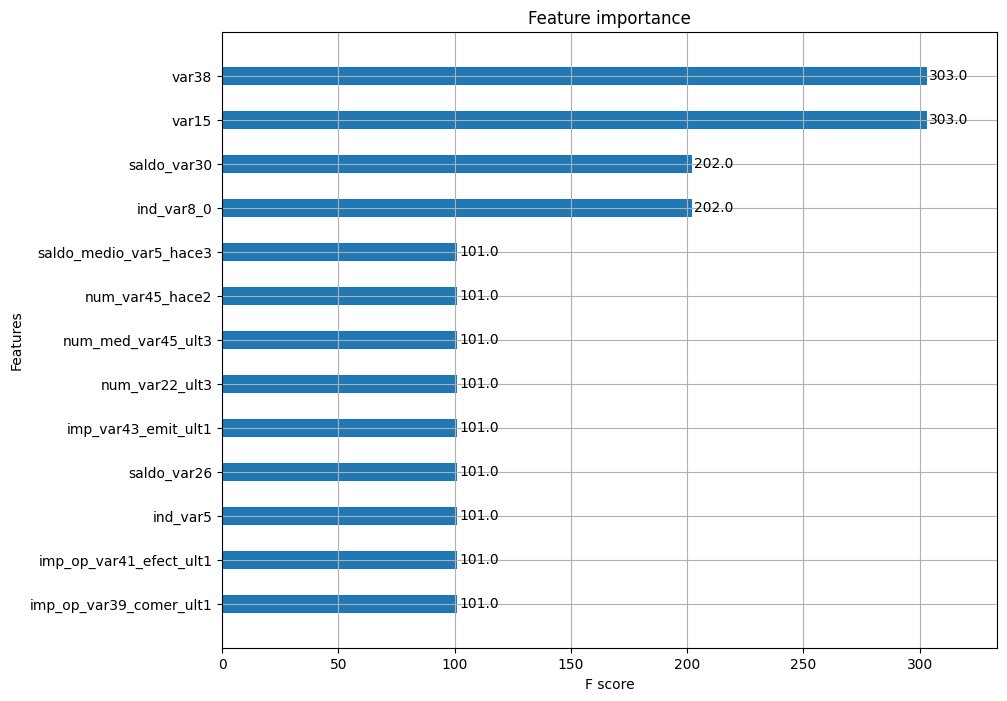

In [29]:
# 피처의 중요도를 시각화하여 보기
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

In [31]:
# LightGBM 모델 학습과 하이퍼 파라미터 튜닝(276)
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)
eval_set=[(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print(f'ROC-AUC : {lgbm_roc_score}')

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	training's auc: 0.830333	training's binary_logloss: 0.158262	valid_1's auc: 0.800033	valid_1's binary_logloss: 0.156656
[2]	training's auc: 0.835095	training's binary_logloss: 0.152432	valid_1's auc: 0.806471	valid_1's binary_logloss: 0.15186
[3]	training's auc: 0.84184	training's binary_logloss: 0.1482	valid_1's auc: 0.808535	valid_1's binary_logloss: 0.148619
[4]	training's auc: 0.847707	training's binary_logloss: 0.144867	valid_1's auc: 0.812339	valid_1's binary_logloss: 0.146112
[5]	training's auc: 0.852553	training's binary_logloss: 0.141937	valid_1's auc: 0.816928	valid_1's binary_logloss: 0.14387
[6]	training's auc: 0.854143	training's binary_logloss: 0.139571	valid_1's auc: 0.817505	valid_1's binary_logloss: 0.142262
[7]	training's auc: 0.857426	training's binary_logloss: 0.137489	valid_1's auc: 0.820769	valid_1's binary_logloss: 0.14087
[8]	training's auc: 0.862499	training's binary_logloss: 0.135785	valid_1's auc: 0.824541	valid_1's binary_logloss: 0.139729
[9]	training's

In [47]:
# 앞서 XGB와 목적함수가 크게 다르지는 않지만, LGBMClassifer 객체를 생성하는 부분이 다르다
def objective_func(search_space):
    # 하이퍼 파라미터 검색 공간
    lgbm_clf = LGBMClassifier(n_estimators=100,
                              num_leaves=int(search_space['num_leaves']),
                              max_depth=int(search_space['max_depth']),
                              min_child_samples=int(search_space['min_child_samples']),
                              subsample=search_space['subsample']
                            , learning_rate=search_space['learning_rate']
                           )
    
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list= []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행.
        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc'
                   , eval_set=[(X_tr, y_tr), (X_val, y_val)])
    
        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음. 
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
    
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환. 
    return -1 * np.mean(roc_auc_list) 

In [48]:
lgbm_search_space = {
    'num_leaves':hp.quniform('num_leaves', 32, 64, 1),
    'max_depth' : hp.quniform('max_depth', 100, 160, 1),
    'min_child_samples':hp.quniform('min_child_samples', 60, 100, 1),
    'subsample' : hp.uniform('subsample', 0.7, 1),
    'learning_rate':hp.uniform('learning_rate', 0.01, 0.2)
    }

In [49]:
import numpy as np
from hyperopt import fmin, tpe, Trials

# fmin()호출하여 최적 하이퍼파라미터를 도출
trials = Trials()

# fmin() 함수를 호출하고 max_evals 회수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출
best = fmin(fn=objective_func,
           space=lgbm_search_space,
           algo=tpe.suggest,
           max_evals=50,
           trials=trials,
           rstate=np.random.default_rng(seed=30))
print('best: ', best)

  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[5]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[6]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[7]	validation_0-auc:0.50000	validation_1-auc:0.50000                                                                  
[8]	validation_0-auc:0.50000	validation_

In [55]:
lgbm_clf = LGBMClassifier(n_estimators=500,
                          num_leaves=int(best['num_leaves']),
                          max_dept=int(best['max_depth']),
                          min_child_samples=int(best['min_child_samples']),
                          subsample=round(best['subsample'], 5),
                          learning_rate=round(best['learning_rate'], 5)
                        )

# evaluation metric를 auc로, early stopping은 100으로 설정하고 학습 수행
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric="auc", eval_set=[(X_tr, y_tr), (X_val, y_val)])

lgbm_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print(f'ROC-AUC : {lgbm_roc_score}')

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: max_dept
[1]	training's auc: 0.831943	training's binary_logloss: 0.165429	valid_1's auc: 0.805252	valid_1's binary_logloss: 0.16258
[2]	training's auc: 0.834816	training's binary_logloss: 0.163468	valid_1's auc: 0.806158	valid_1's binary_logloss: 0.160906
[3]	training's auc: 0.835214	training's binary_logloss: 0.161705	valid_1's auc: 0.806401	valid_1's binary_logloss: 0.15937
[4]	training's auc: 0.838046	training's binary_logloss: 0.16006	valid_1's auc: 0.809815	valid_1's binary_logloss: 0.157896
[5]	training's auc: 0.838889	training's binary_logloss: 0.158586	valid_1's auc: 0.8101	valid_1's binary_logloss: 0.156617
[6]	training's auc: 0.839775	training's binary_logloss: 0.157206	valid_1's auc: 0.810869	valid_1's binary_logloss: 0.155391
[7]	training's auc: 0.840931	training's binary_logloss: 0.155911	valid_1's auc: 0.812251	valid_1's binary_logloss: 0.154256
[8]	training's auc: 0.841515	training's binary_logloss: 0.154713	valid_1's auc: 0.812121

In [ ]:
# evluation 을 metric로 